In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import os
import csv

from matplotlib import rc

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

# Funzioni utili

Funzioni per le routine del fit.  **Vanno compilate.**

Alla fine quella che uso è cauchy_asim (una cauchy asimmetrica) e fit_func (che è cauchy_asim su un bkg polinomiale di grado 1)

In [2]:
def cauchy(x,gamma,center):
    return (1./np.pi)*gamma/((x-center)**2+gamma**2)

def cauchy_asim(x,gamma,center,asim): #the gamma are HWHM
    gamma = gamma*2
    gamma_l = asim*gamma/(asim + 1.)
    gamma_r = gamma/(asim + 1.)
    if isinstance(x,float):
        if x < center:
            y = (gamma_l**2 )/ ((x - center)**2 + gamma_l**2) 

            if x >= center:
                y = (gamma_r**2 )/ ((x - center)**2 + gamma_r**2) 
    else:
        pos_vec = np.where(x >= center)[0]
        pos = int(pos_vec[0]) 
        SS = x[0:pos]
        DD = x[pos:int(len(x))]
        
        numerator1 = gamma_l**2
        denominator1 = (SS - center)**2 + gamma_l**2
        y1 = numerator1/denominator1
        
        numerator2 = gamma_r**2
        denominator2 = (DD - center)**2 + gamma_r**2
        y2 = numerator2/denominator2
        
        y = np.append(y1,y2)
        norm1 = 1./(np.pi*gamma_l*2)
        norm2 = 1./(np.pi*gamma_r*2)
        y = y *(norm1 + norm2)

    return y

def fit_func(x,norm,gamma,center,m,offset,asim):
    #out = offset+x*m-norm*cauchy(x,gamma,center)
    out = offset+x*m-norm*cauchy_asim(x,gamma,center,asim)
    return out

def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Salvo il .csv riassuntivo

Opening  Zoomed_peak10_23:03:08:12:43:42.dat ...


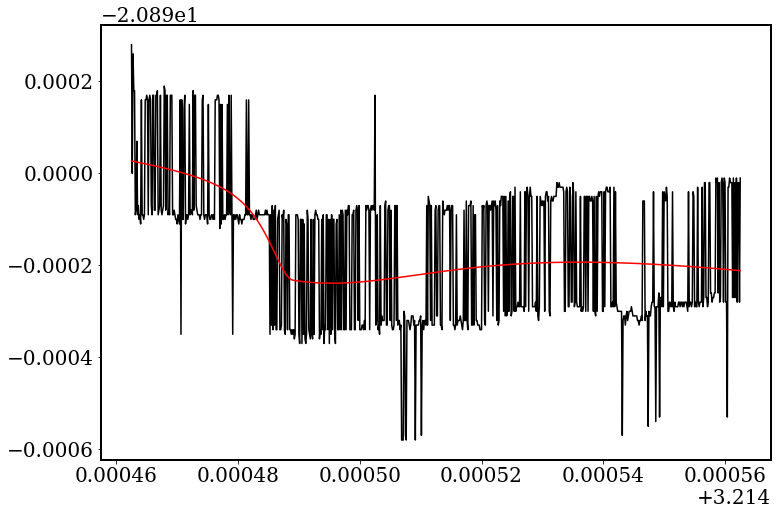

Q_factor =  7.99e+04 +/- 0.043195799456028854 	 |	 center = 3.214489086652826
RMSE =  0.00013095116266415875
#===================================
Opening  Zoomed_peak25_23:03:08:14:33:24.dat ...


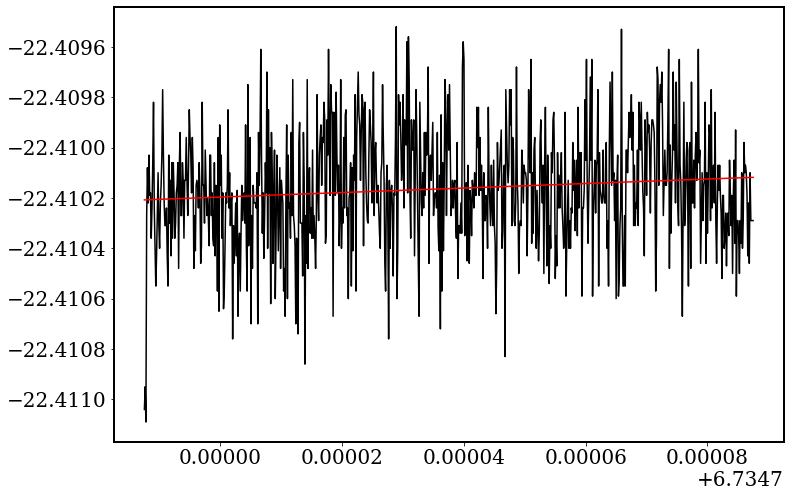

Q_factor =  3.38e+03 +/- 3336184.557510016 	 |	 center = 6.734714083265933
RMSE =  0.00023418066097755086
#===================================
Opening  Zoomed_peak84_23:03:08:18:40:29.dat ...


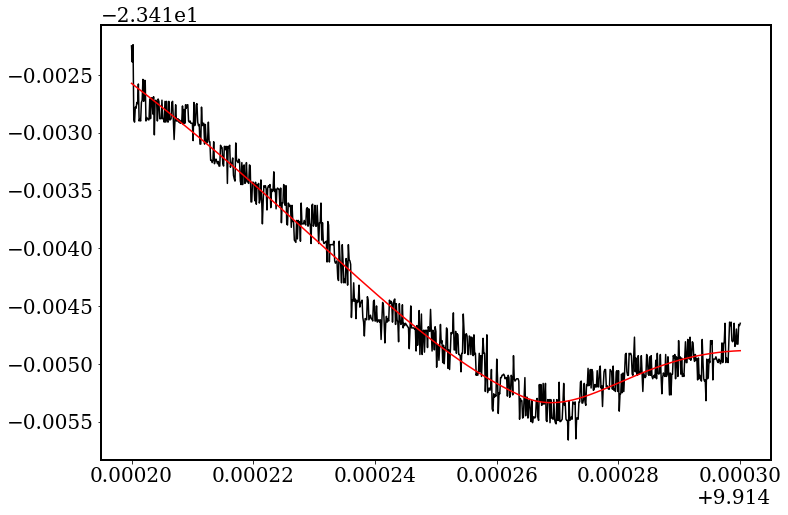

Q_factor =  1.16e+05 +/- 0.006352490540100354 	 |	 center = 9.914263935661724
RMSE =  0.0001403274094337192
#===================================
Opening  Zoomed_peak33_23:03:08:15:31:41.dat ...


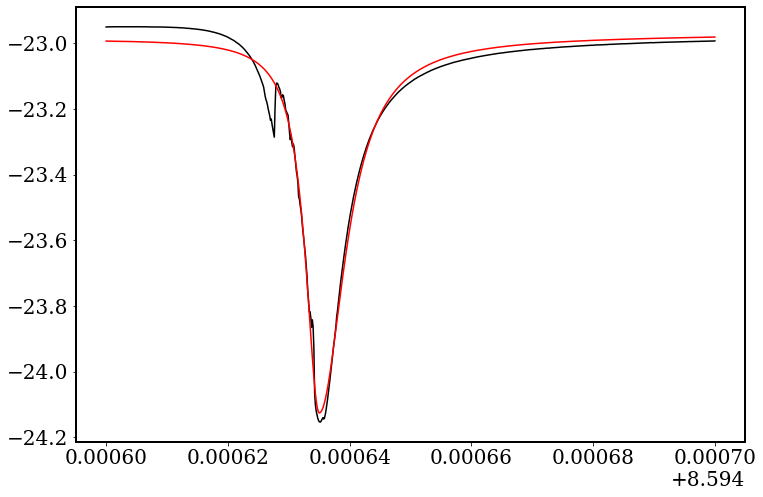

Q_factor =  1.10e+06 +/- 0.005143238964018027 	 |	 center = 8.594635012278141
RMSE =  0.03180570970526334
#===================================
Opening  Zoomed_peak9_23:03:08:12:40:15.dat ...


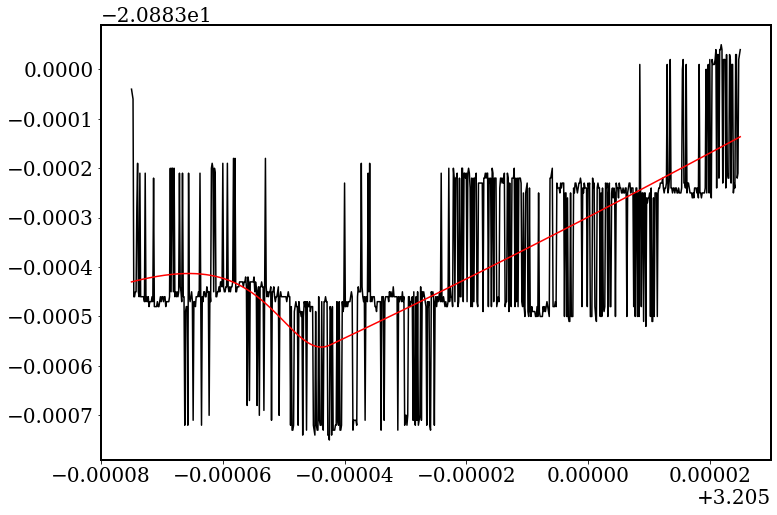

Q_factor =  1.33e+04 +/- 0.011400429626060997 	 |	 center = 3.2049575631809404
RMSE =  0.000125845592006983
#===================================
Opening  Zoomed_peak52_23:03:08:16:51:31.dat ...


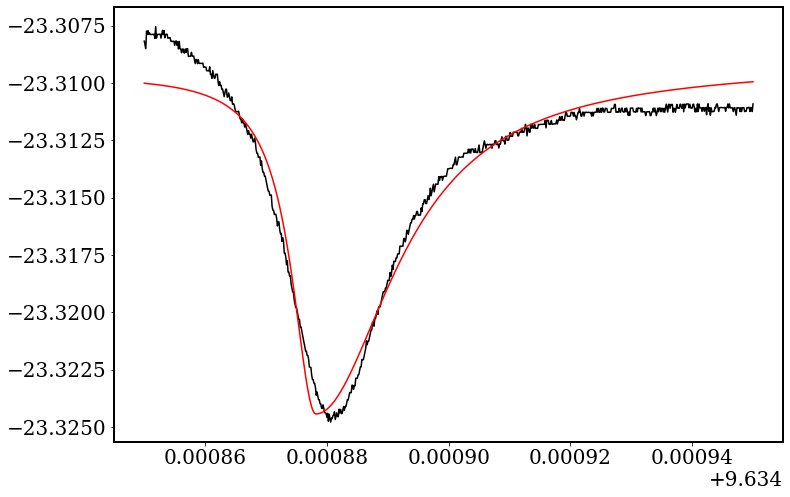

Q_factor =  4.75e+05 +/- 0.006691885810573466 	 |	 center = 9.634878198400799
RMSE =  0.0008816075998730587
#===================================
Opening  Zoomed_peak38_23:03:08:15:51:14.dat ...


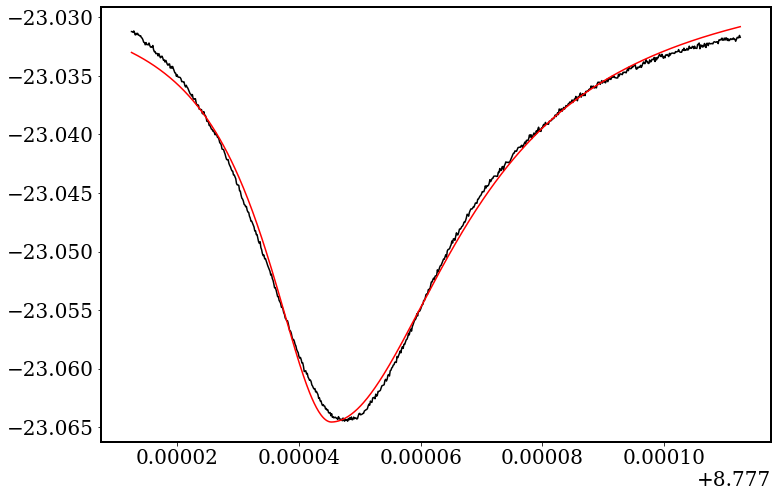

Q_factor =  2.30e+05 +/- 0.0020674323773007 	 |	 center = 8.777045376422155
RMSE =  0.0006712304777040815
#===================================
Opening  Zoomed_peak141_23:03:09:00:01:07.dat ...


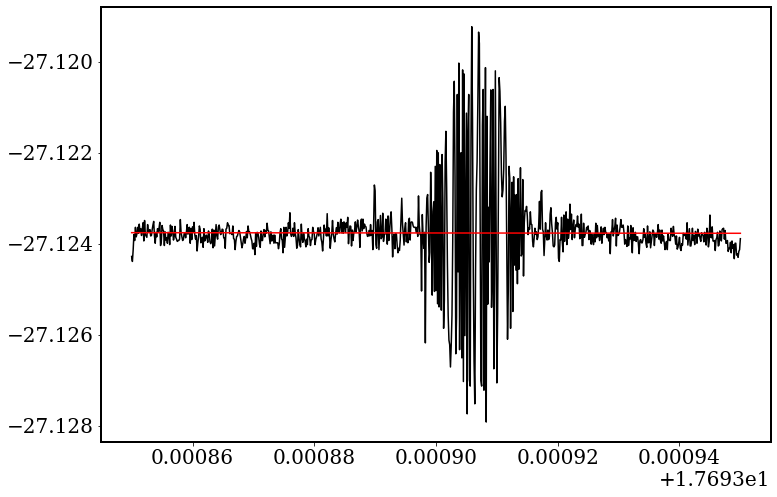

Q_factor =  8.88e+03 +/- 3052846.654425127 	 |	 center = 17.693949376470922
RMSE =  0.0008859440184579727
#===================================
Opening  Zoomed_peak120_23:03:08:22:17:46.dat ...


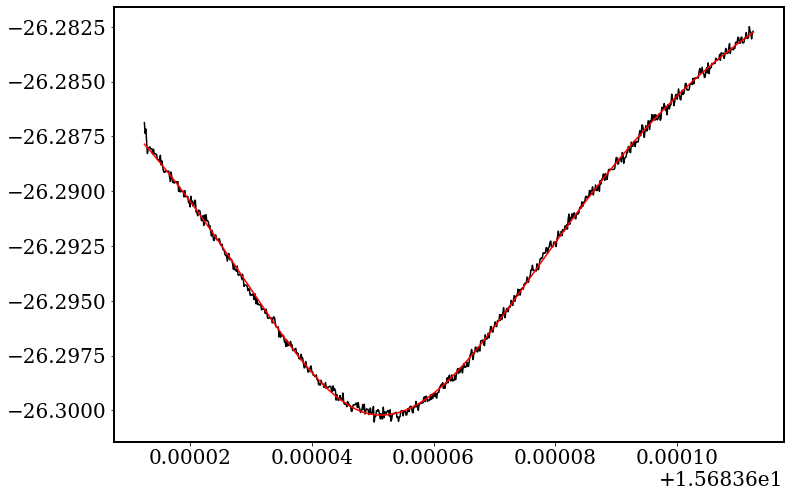

Q_factor =  1.89e+05 +/- 0.000662902619039551 	 |	 center = 15.683651603577715
RMSE =  0.00016485468826195131
#===================================
Opening  Zoomed_peak50_23:03:08:16:44:20.dat ...


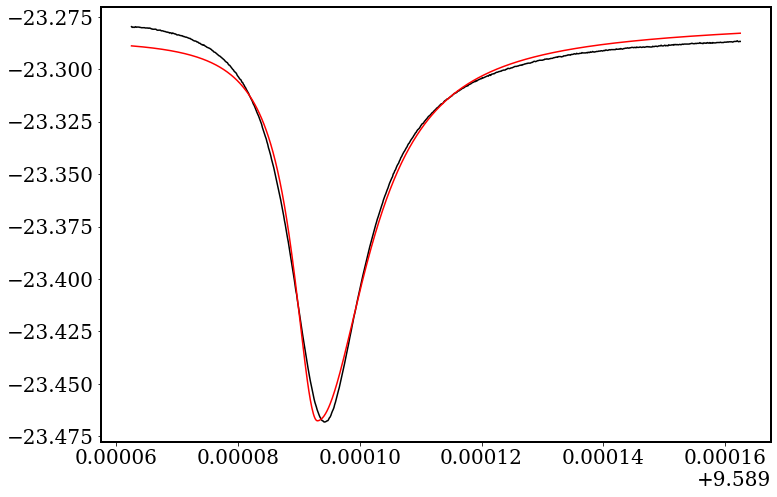

Q_factor =  6.51e+05 +/- 0.0033754658182034284 	 |	 center = 9.589093032543353
RMSE =  0.004398972834601421
#===================================
Opening  Zoomed_peak122_23:03:08:22:31:02.dat ...


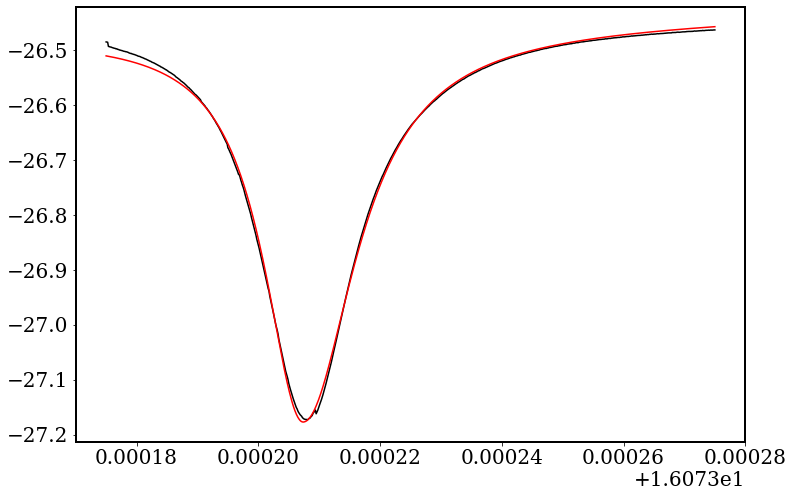

Q_factor =  8.81e+05 +/- 0.001374604880061466 	 |	 center = 16.073207378878255
RMSE =  0.00703193615088992
#===================================
Opening  Zoomed_peak138_23:03:08:23:30:07.dat ...


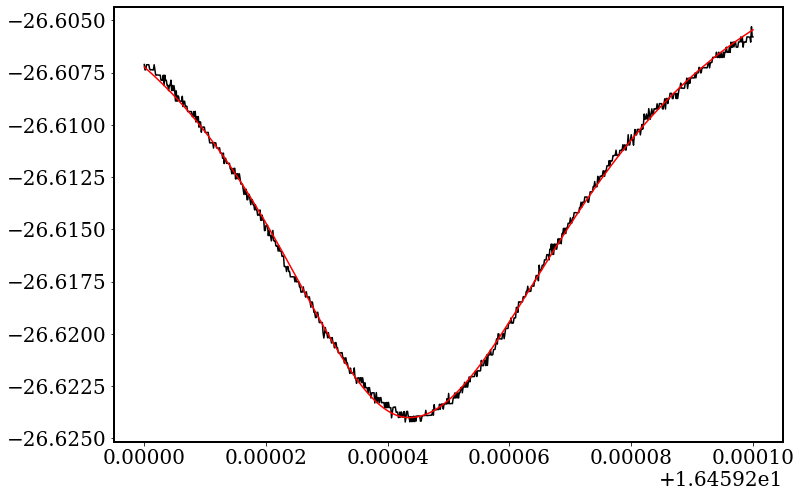

Q_factor =  2.49e+05 +/- 0.0008623526347442718 	 |	 center = 16.45924358665181
RMSE =  0.0002006981489710342
#===================================
Opening  Zoomed_peak123_23:03:08:22:35:31.dat ...


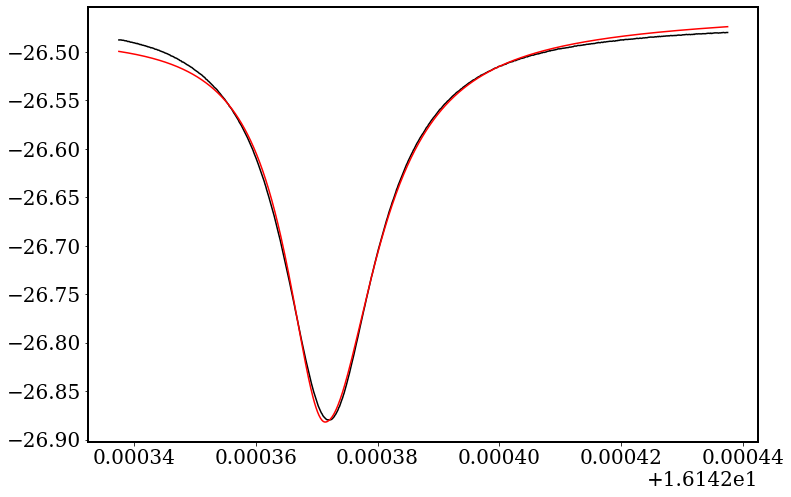

Q_factor =  9.10e+05 +/- 0.001740579056129409 	 |	 center = 16.142371392792565
RMSE =  0.005007923024193211
#===================================
Opening  Zoomed_peak46_23:03:08:16:29:54.dat ...


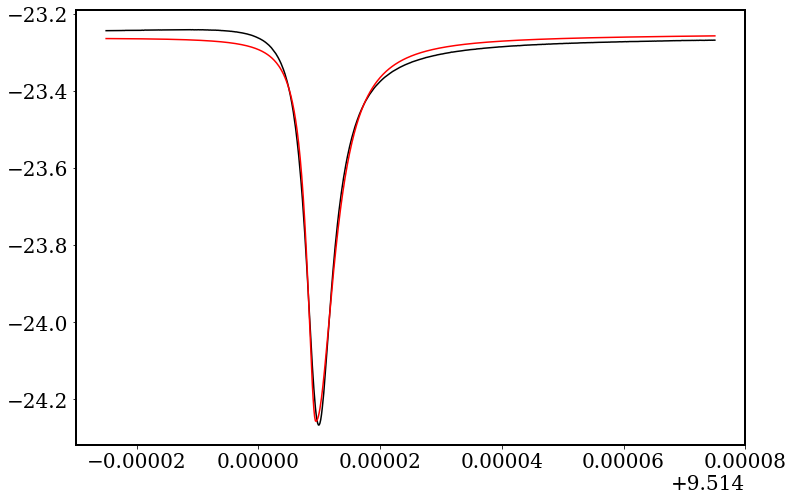

Q_factor =  1.76e+06 +/- 0.004109268057077503 	 |	 center = 9.51400944318739
RMSE =  0.019324710643921453
#===================================
Opening  Zoomed_peak71_23:03:08:17:56:17.dat ...


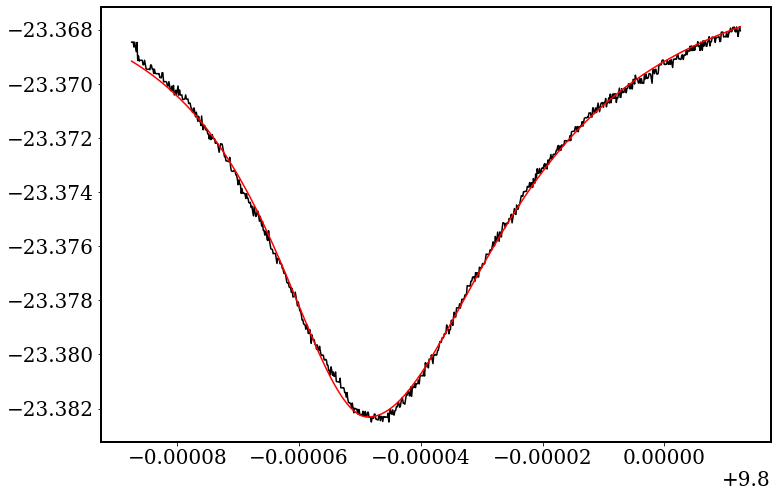

Q_factor =  2.09e+05 +/- 0.0012666002410528642 	 |	 center = 9.79995140997347
RMSE =  0.00018377587308523064
#===================================
Opening  Zoomed_peak130_23:03:08:23:01:09.dat ...


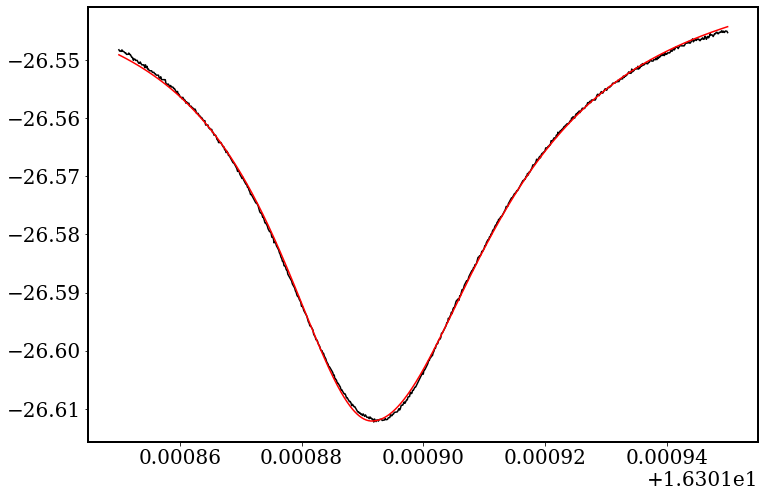

Q_factor =  3.79e+05 +/- 0.0006307919577213581 	 |	 center = 16.301891608618188
RMSE =  0.0004144614473803604
#===================================
Opening  Zoomed_peak127_23:03:08:22:50:07.dat ...


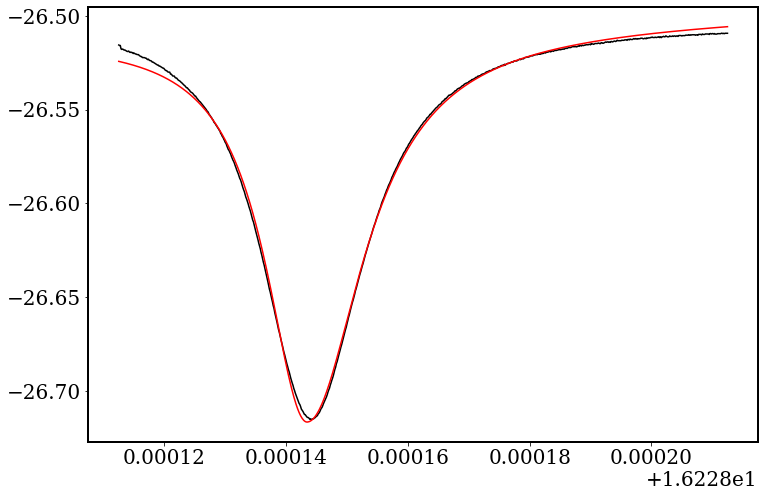

Q_factor =  8.34e+05 +/- 0.0016872428587196306 	 |	 center = 16.2281434529846
RMSE =  0.0025810138232321526
#===================================
Opening  Zoomed_peak62_23:03:08:17:25:53.dat ...


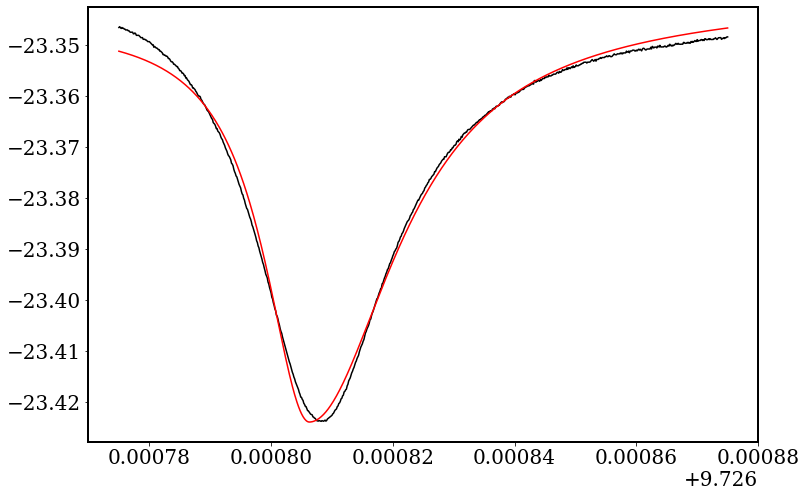

Q_factor =  3.72e+05 +/- 0.002765141432307769 	 |	 center = 9.72680631536294
RMSE =  0.0018042796113419083
#===================================
Opening  Zoomed_peak58_23:03:08:17:12:20.dat ...


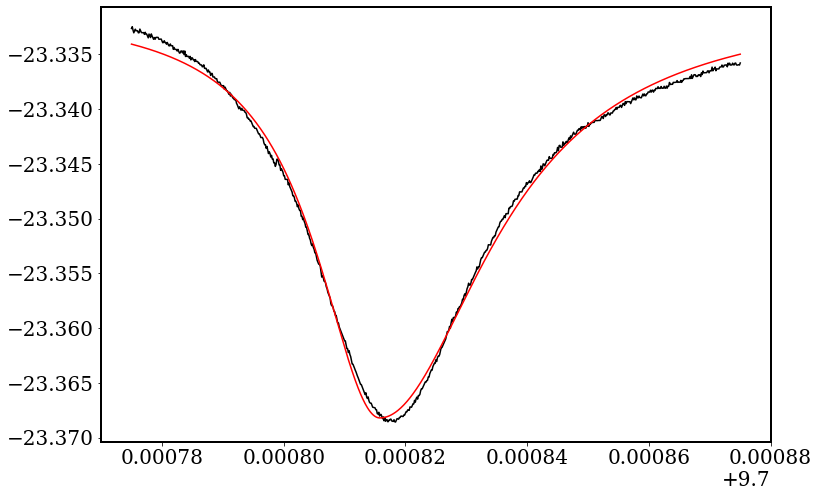

Q_factor =  2.80e+05 +/- 0.0020929344115142748 	 |	 center = 9.700815794417576
RMSE =  0.0006739925922796832
#===================================
Opening  Zoomed_peak139_23:03:08:23:33:33.dat ...


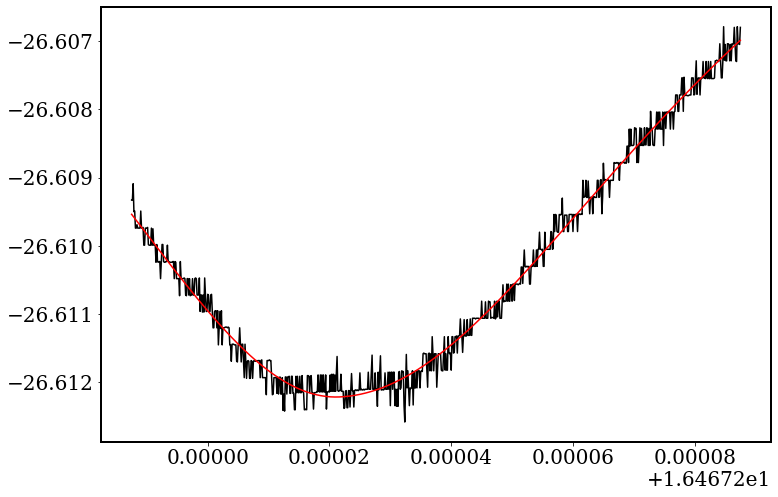

Q_factor =  1.32e+05 +/- 0.005164321910134097 	 |	 center = 16.467221622334854
RMSE =  0.0001664138354575437
#===================================
Opening  Zoomed_peak27_23:03:08:14:55:29.dat ...


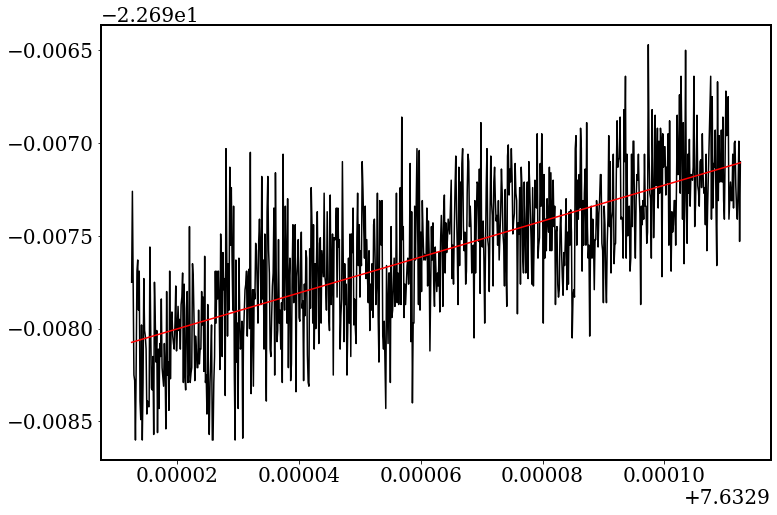

Q_factor =  3.92e+03 +/- 437720.4436858763 	 |	 center = 7.632914757880557
RMSE =  0.00028436501743899314
#===================================
Opening  Zoomed_peak82_23:03:08:18:33:35.dat ...


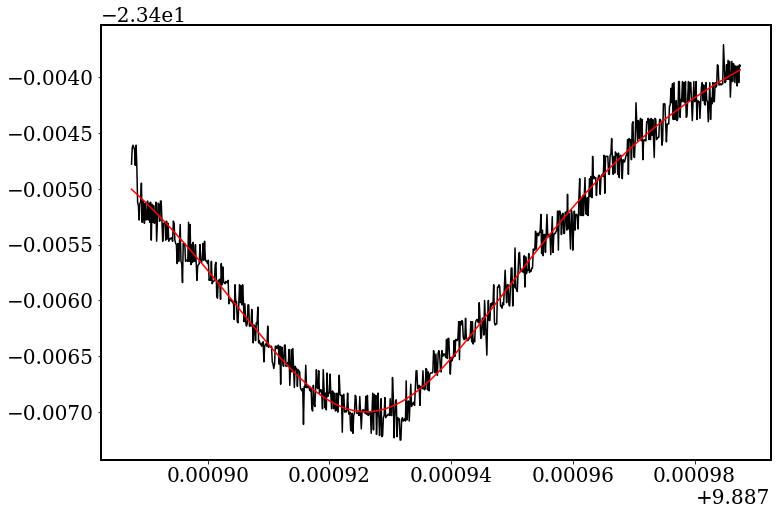

Q_factor =  1.29e+05 +/- 0.003247101746667872 	 |	 center = 9.887926472347587
RMSE =  0.00012648420132795477
#===================================
Opening  Zoomed_peak140_23:03:08:23:37:52.dat ...


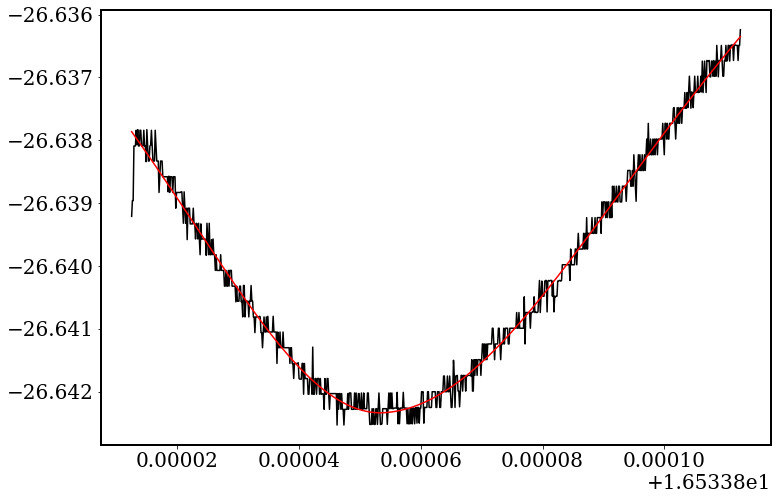

Q_factor =  1.37e+05 +/- 0.0021017294362599193 	 |	 center = 16.533854202144276
RMSE =  0.0001753360701804449
#===================================
Opening  Zoomed_peak132_23:03:08:23:08:34.dat ...


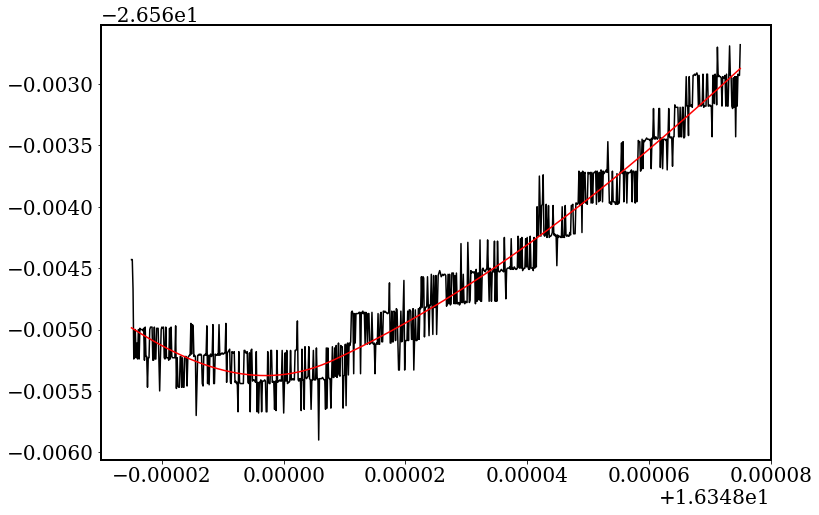

Q_factor =  5.54e+04 +/- 0.015817373484912845 	 |	 center = 16.348008267410737
RMSE =  0.00016899597496680802
#===================================
Opening  Zoomed_peak48_23:03:08:16:37:40.dat ...


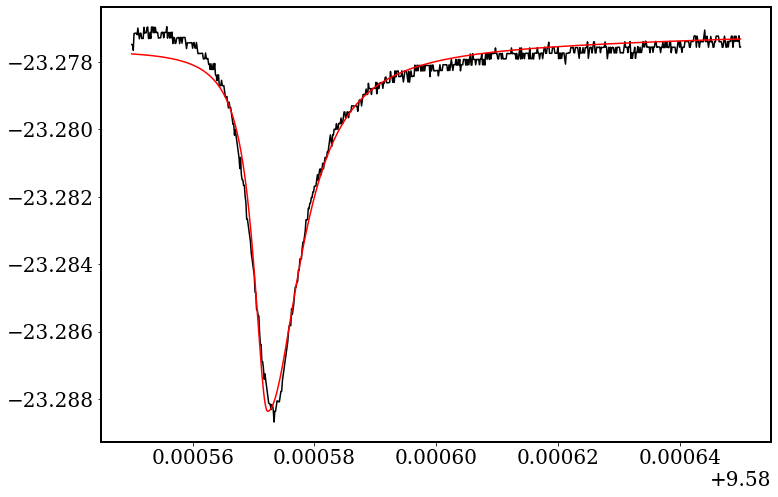

Q_factor =  1.03e+06 +/- 0.004630536160883692 	 |	 center = 9.580572318511988
RMSE =  0.0003061854030764465
#===================================
Opening  Zoomed_peak57_23:03:08:17:08:32.dat ...


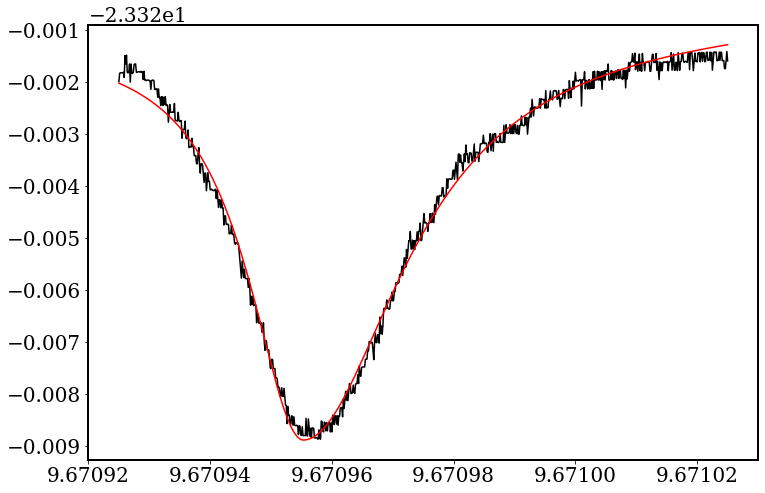

Q_factor =  3.11e+05 +/- 0.0028714521185799436 	 |	 center = 9.670955351041465
RMSE =  0.00019033484828478403
#===================================
Opening  Zoomed_peak45_23:03:08:16:26:41.dat ...


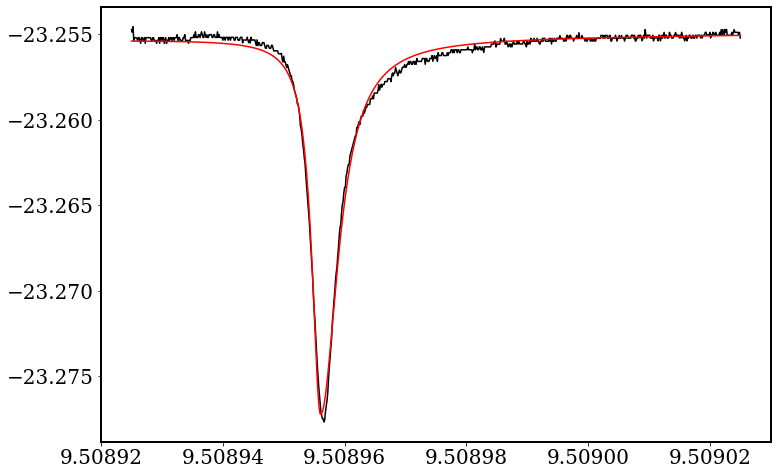

Q_factor =  1.83e+06 +/- 0.003244301064985238 	 |	 center = 9.508956054721342
RMSE =  0.0003272511699913405
#===================================
Opening  Zoomed_peak5_23:03:08:12:07:20.dat ...


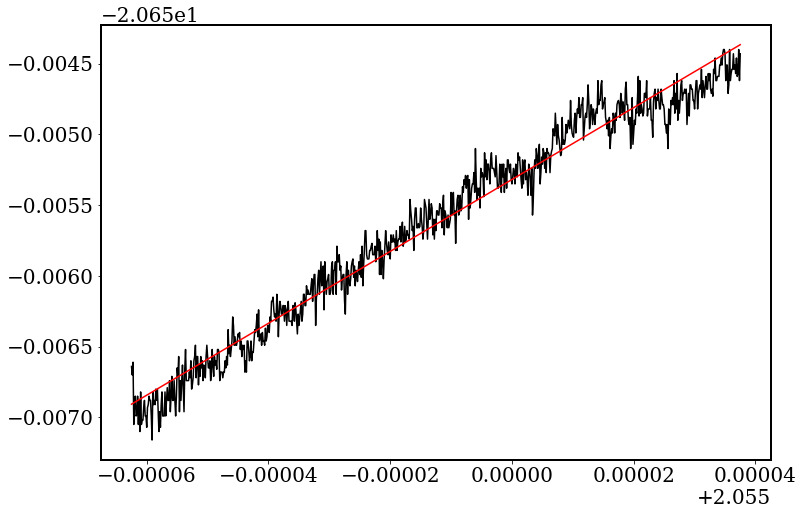

Q_factor =  2.48e+03 +/- 2.6558137218262854e-13 	 |	 center = 2.0550183288392265
RMSE =  0.0001270854635458169
#===================================
Opening  Zoomed_peak36_23:03:08:15:44:23.dat ...


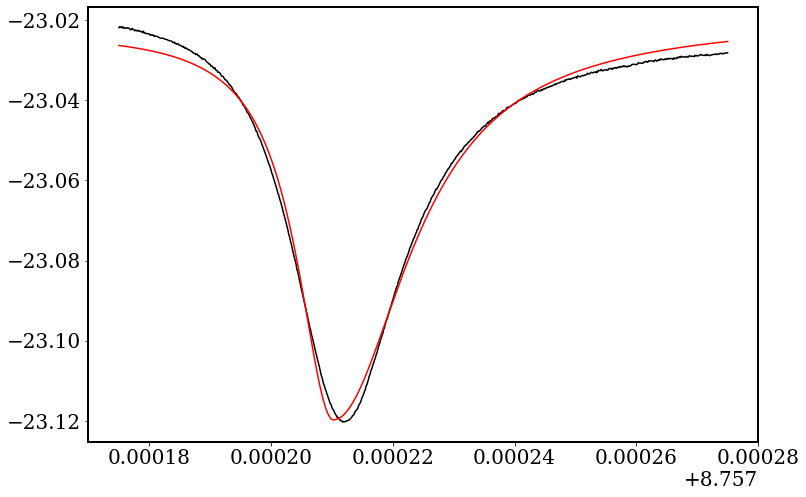

Q_factor =  3.95e+05 +/- 0.0029974856365821813 	 |	 center = 8.75721025688546
RMSE =  0.002357845421829712
#===================================
Opening  Zoomed_peak6_23:03:08:12:10:47.dat ...


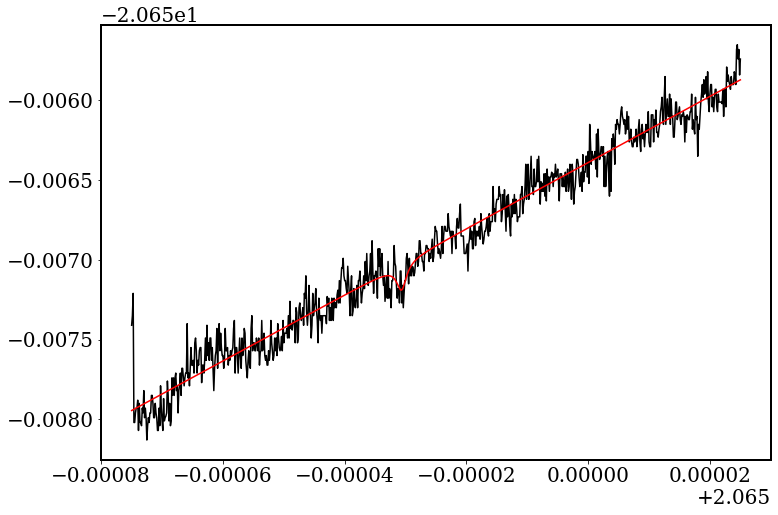

Q_factor =  1.04e+06 +/- 0.24416993453903627 	 |	 center = 2.064969341785316
RMSE =  0.00010499153609753855
#===================================
Opening  Zoomed_peak104_23:03:08:20:44:22.dat ...


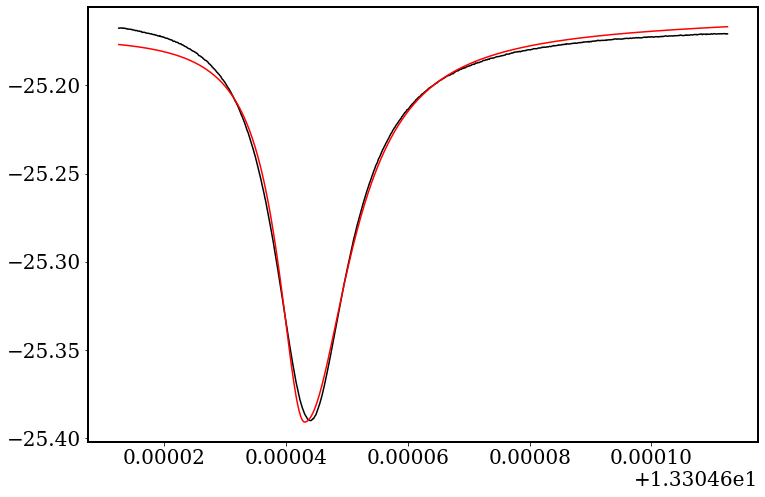

Q_factor =  9.39e+05 +/- 0.002788597472206857 	 |	 center = 13.304643038392257
RMSE =  0.004192551281872747
#===================================
Opening  Zoomed_peak18_23:03:08:13:53:45.dat ...


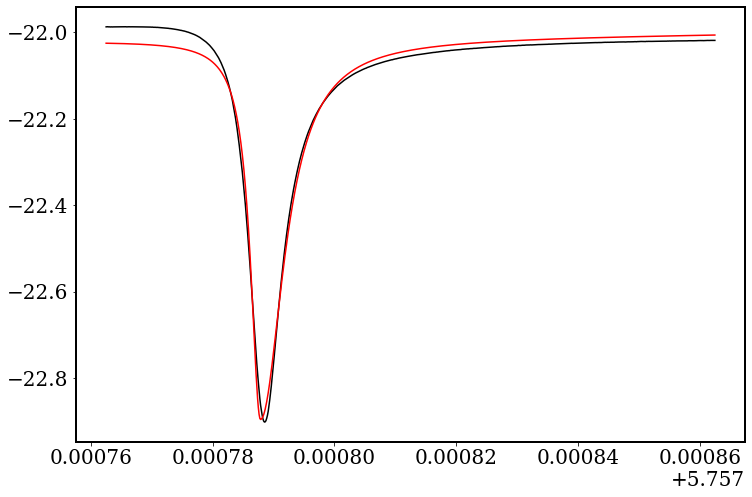

Q_factor =  8.72e+05 +/- 0.004738177859774172 	 |	 center = 5.75778785588646
RMSE =  0.021818811164229845
#===================================
Opening  Zoomed_peak111_23:03:08:21:09:33.dat ...


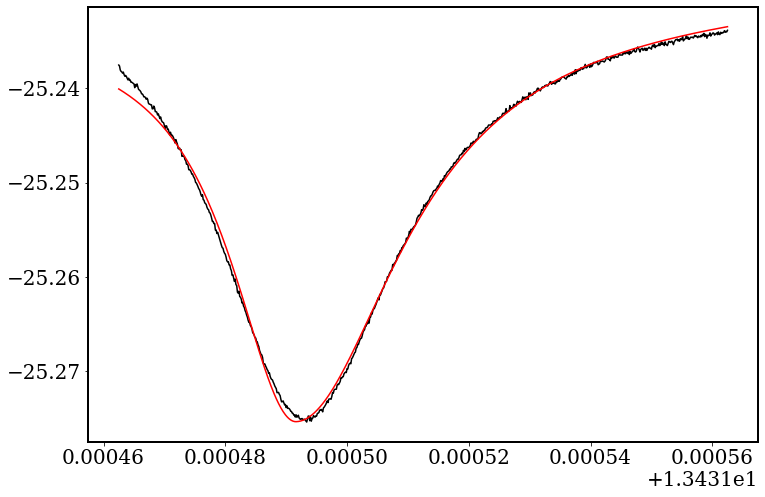

Q_factor =  3.94e+05 +/- 0.0016114182216637768 	 |	 center = 13.43149165741827
RMSE =  0.0005889477507009044
#===================================
Opening  Zoomed_peak103_23:03:08:20:40:35.dat ...


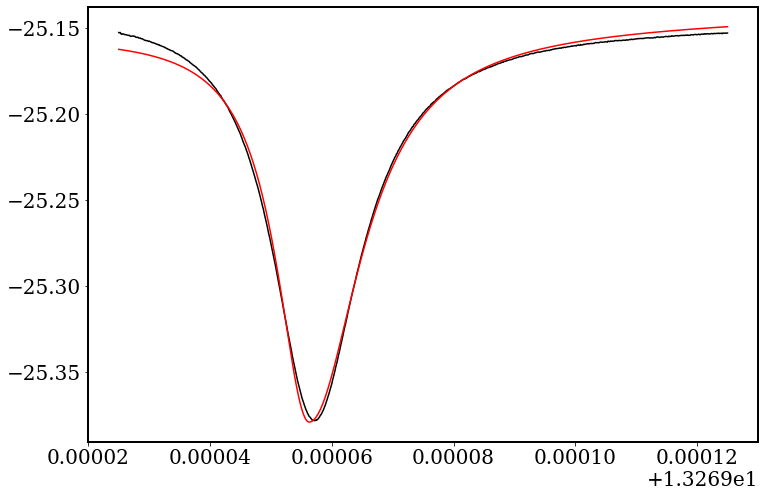

Q_factor =  7.91e+05 +/- 0.0023144100995641207 	 |	 center = 13.269056283634553
RMSE =  0.0037427944931873996
#===================================
Opening  Zoomed_peak94_23:03:08:19:52:51.dat ...


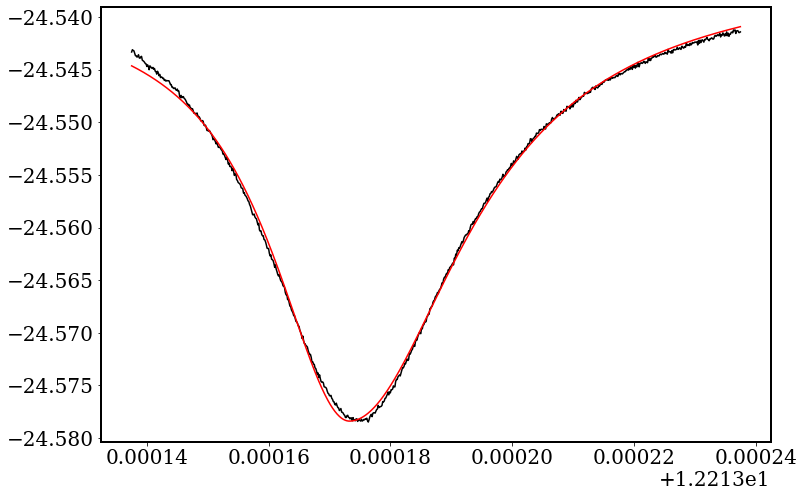

Q_factor =  3.17e+05 +/- 0.0012628842464317935 	 |	 center = 12.21317334011287
RMSE =  0.0004363798054692259
#===================================
Opening  Zoomed_peak125_23:03:08:22:43:27.dat ...


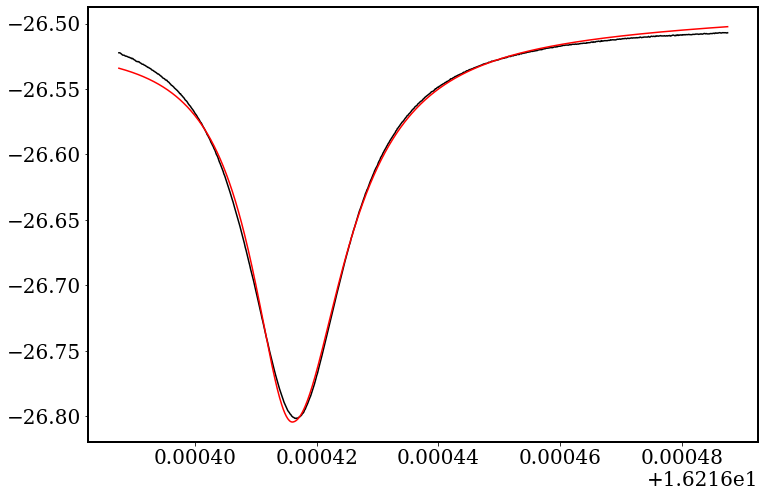

Q_factor =  8.82e+05 +/- 0.001856634849774821 	 |	 center = 16.216416013190358
RMSE =  0.003961538599991948
#===================================
Opening  Zoomed_peak75_23:03:08:18:09:37.dat ...


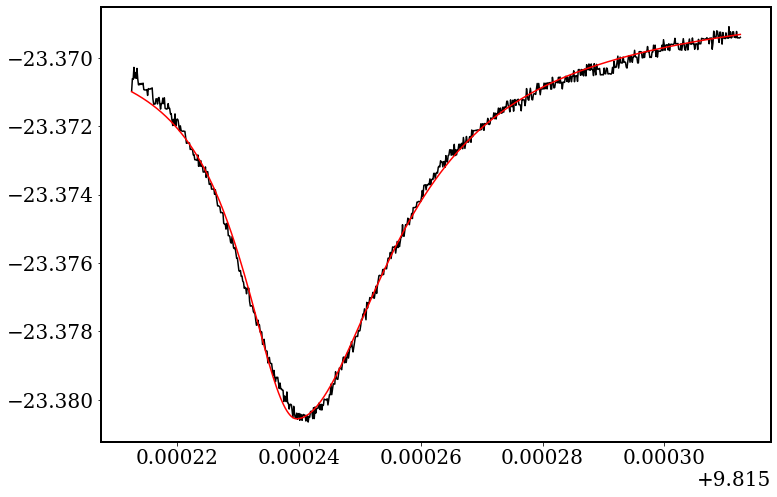

Q_factor =  3.30e+05 +/- 0.0019145028064788828 	 |	 center = 9.815239645426786
RMSE =  0.0001803180287570713
#===================================
Opening  Zoomed_peak67_23:03:08:17:42:26.dat ...


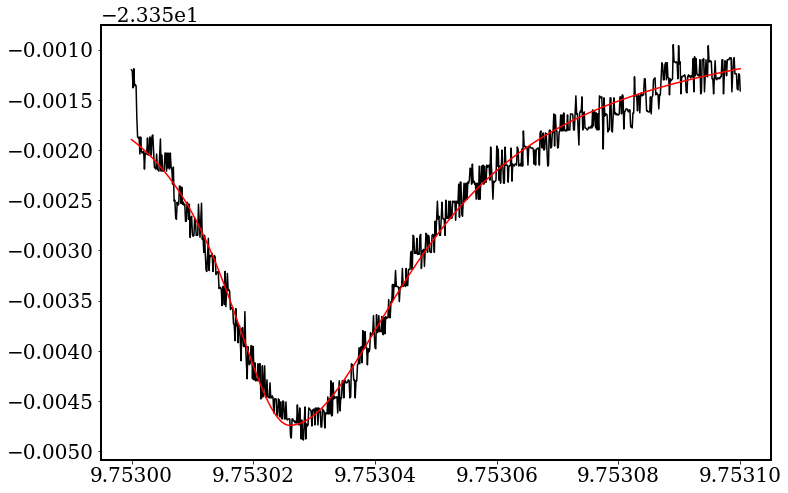

Q_factor =  2.55e+05 +/- 0.004431786997788609 	 |	 center = 9.753026084309383
RMSE =  0.00014375487388415713
#===================================
Opening  Zoomed_peak74_23:03:08:18:06:10.dat ...


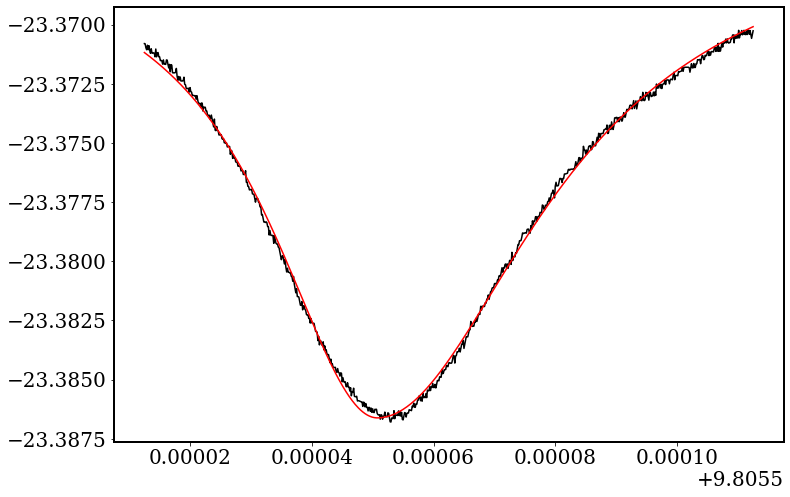

Q_factor =  1.82e+05 +/- 0.001189265863949902 	 |	 center = 9.80555084354953
RMSE =  0.00021766447554026549
#===================================
Opening  Zoomed_peak23_23:03:08:14:24:27.dat ...


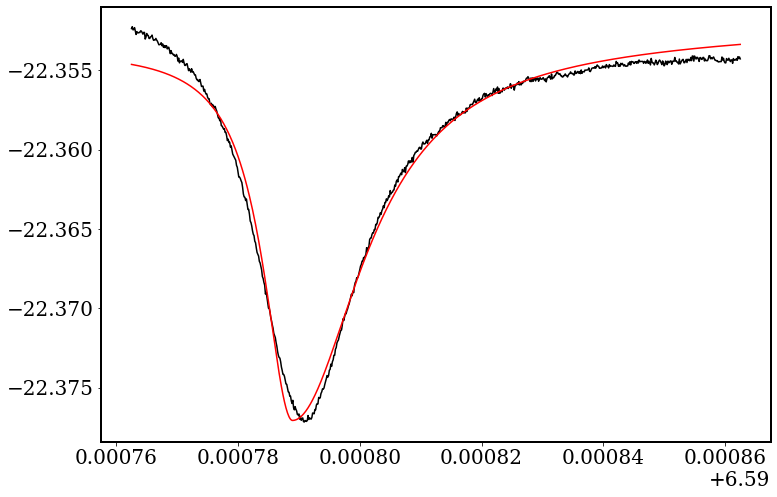

Q_factor =  3.35e+05 +/- 0.0041276099974054 	 |	 center = 6.59078896355757
RMSE =  0.0007793213247036773
#===================================
Opening  Zoomed_peak135_23:03:08:23:19:05.dat ...


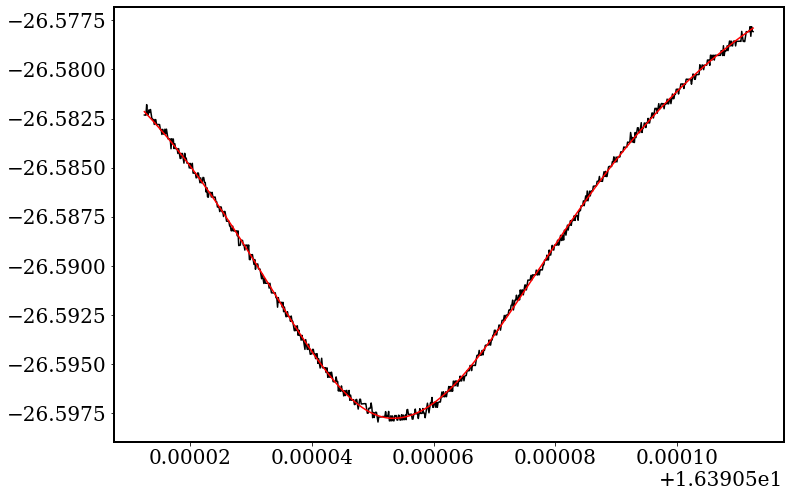

Q_factor =  2.16e+05 +/- 0.0006128596709600074 	 |	 center = 16.390553569892162
RMSE =  0.0001664633364242711
#===================================
Opening  Zoomed_peak12_23:03:08:13:24:03.dat ...


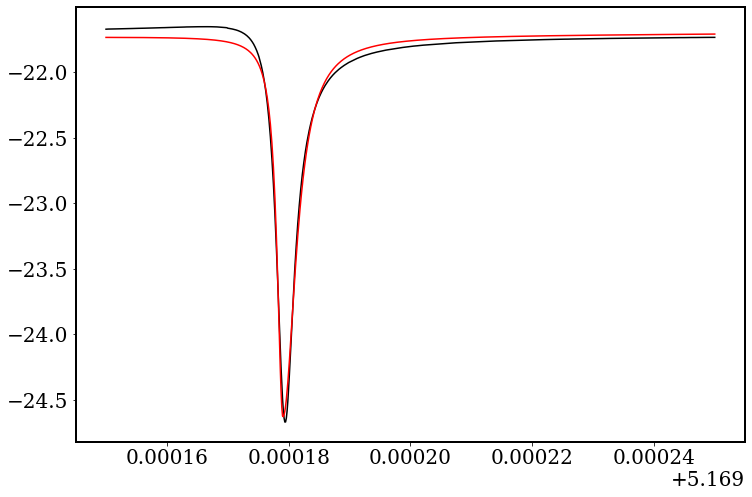

Q_factor =  1.40e+06 +/- 0.004953708919004548 	 |	 center = 5.16917906083477
RMSE =  0.05717126975377459
#===================================
Opening  Zoomed_peak3_23:03:08:11:55:37.dat ...


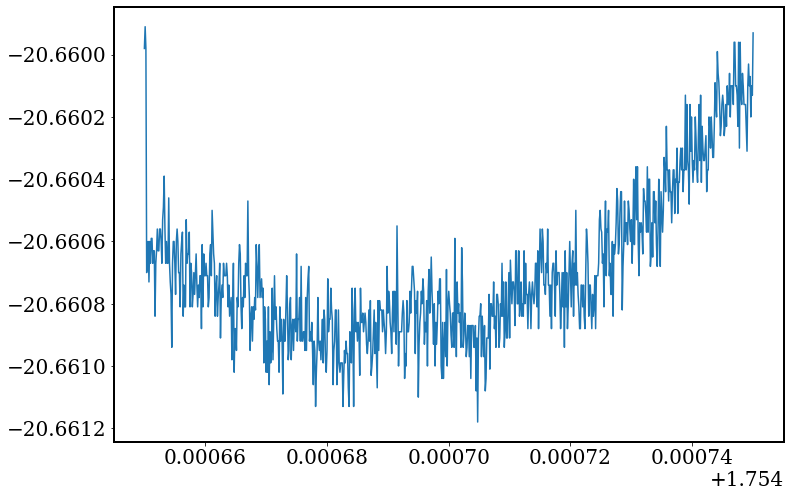

There was a problem during the fit!
#===================================
Opening  Zoomed_peak98_23:03:08:20:21:06.dat ...


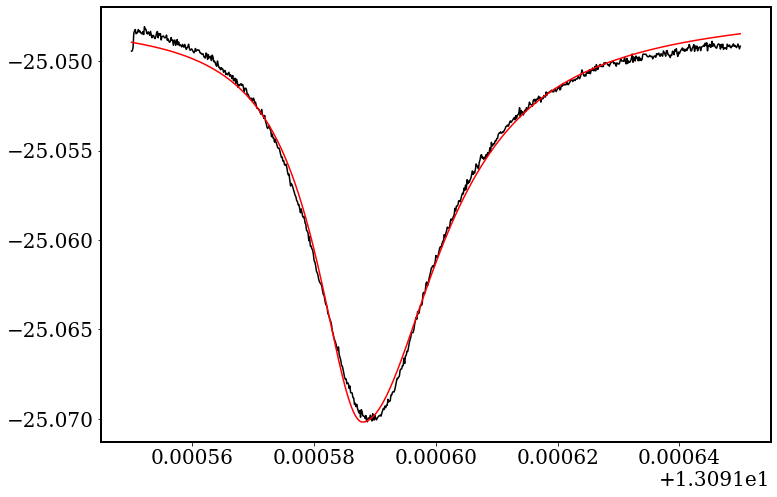

Q_factor =  5.39e+05 +/- 0.002272767824838876 	 |	 center = 13.091587955638992
RMSE =  0.0004065160253537257
#===================================
Opening  Zoomed_peak115_23:03:08:21:24:53.dat ...


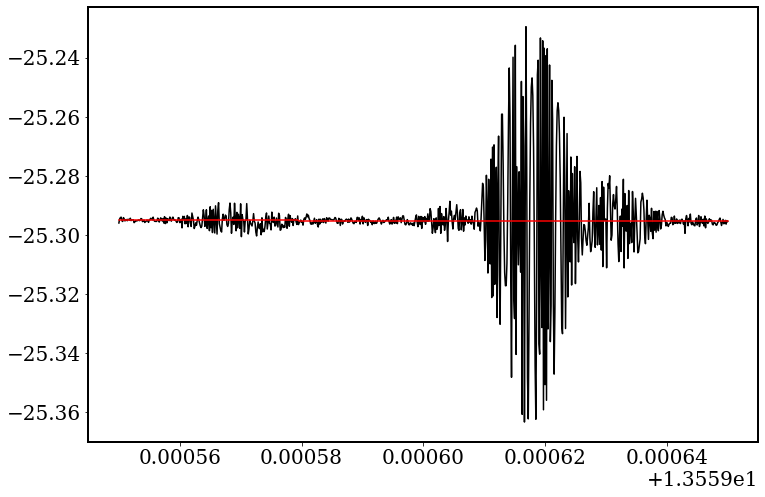

Q_factor =  7.13e+03 +/- 20280239.288924124 	 |	 center = 13.559649555626754
RMSE =  0.013837121905824491
#===================================
Opening  Zoomed_peak49_23:03:08:16:41:07.dat ...


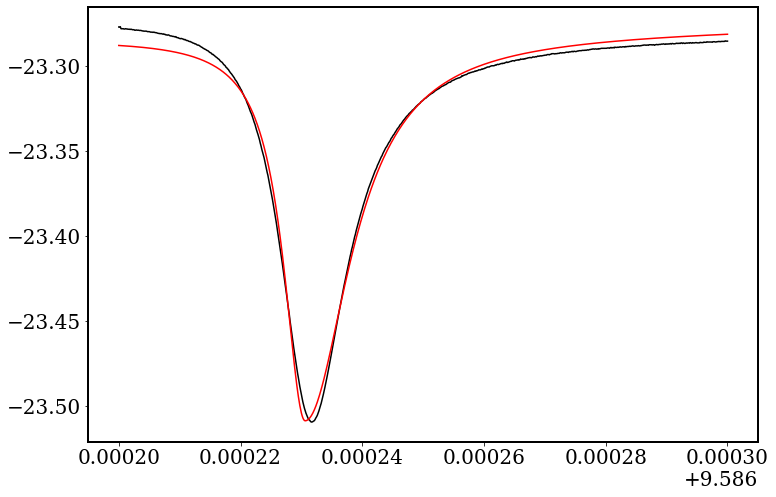

Q_factor =  7.27e+05 +/- 0.0032932203901359673 	 |	 center = 9.586230620499105
RMSE =  0.005074082892351666
#===================================
Opening  Zoomed_peak88_23:03:08:19:06:41.dat ...


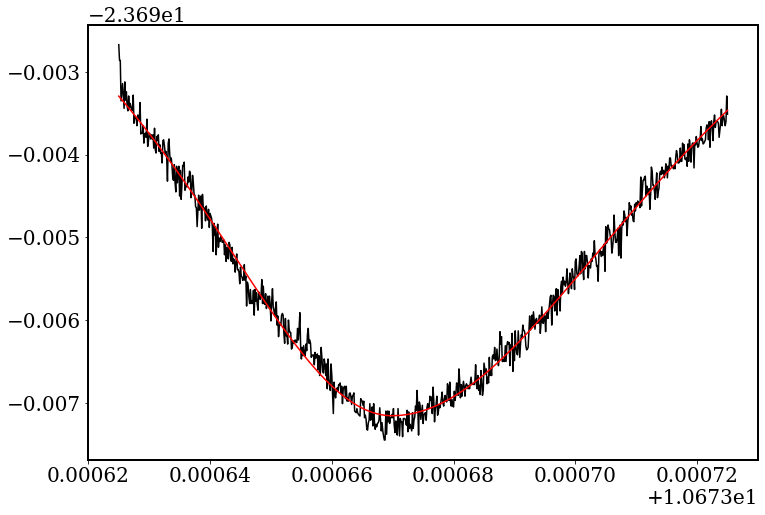

Q_factor =  1.04e+05 +/- 0.0016300321214282516 	 |	 center = 10.673669913437836
RMSE =  0.00013001170255428338
#===================================
Opening  Zoomed_peak66_23:03:08:17:39:13.dat ...


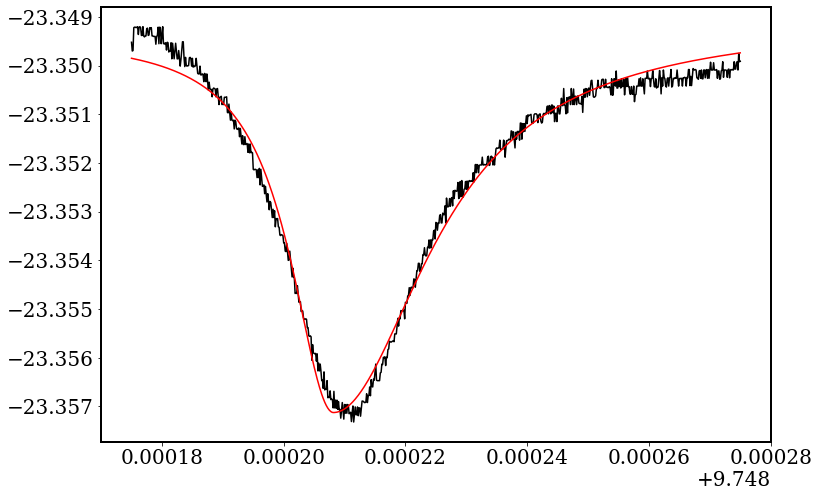

Q_factor =  3.55e+05 +/- 0.004163420424174417 	 |	 center = 9.74820818943278
RMSE =  0.00027896941691599793
#===================================
Opening  Zoomed_peak39_23:03:08:15:55:32.dat ...


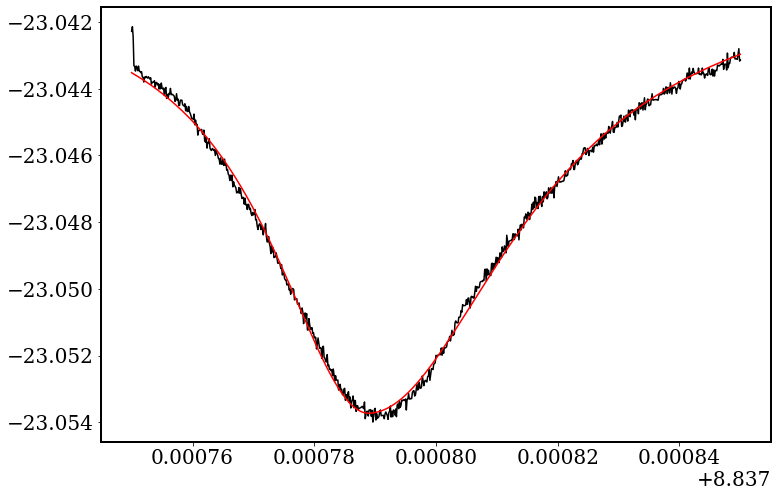

Q_factor =  1.79e+05 +/- 0.0016128612077902407 	 |	 center = 8.83778895275658
RMSE =  0.00018384220099823447
#===================================
Opening  Zoomed_peak105_23:03:08:20:48:00.dat ...


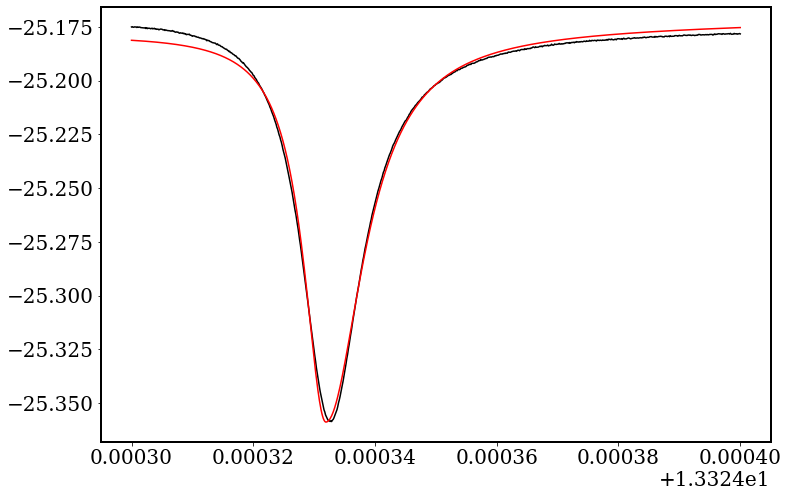

Q_factor =  1.13e+06 +/- 0.0027011331875248065 	 |	 center = 13.324331937934572
RMSE =  0.0031063929534353055
#===================================
Opening  Zoomed_peak59_23:03:08:17:15:46.dat ...


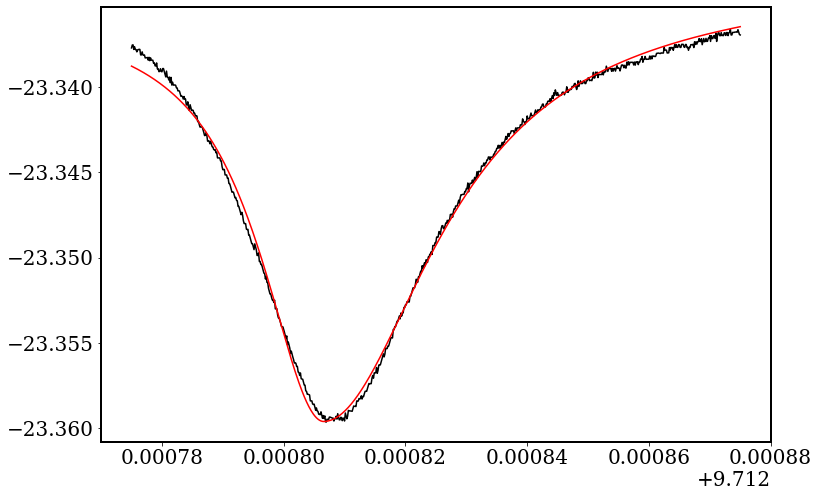

Q_factor =  2.79e+05 +/- 0.0019808044402077935 	 |	 center = 9.71280662647705
RMSE =  0.0004141727018286066
#===================================
Opening  Zoomed_peak129_23:03:08:22:57:42.dat ...


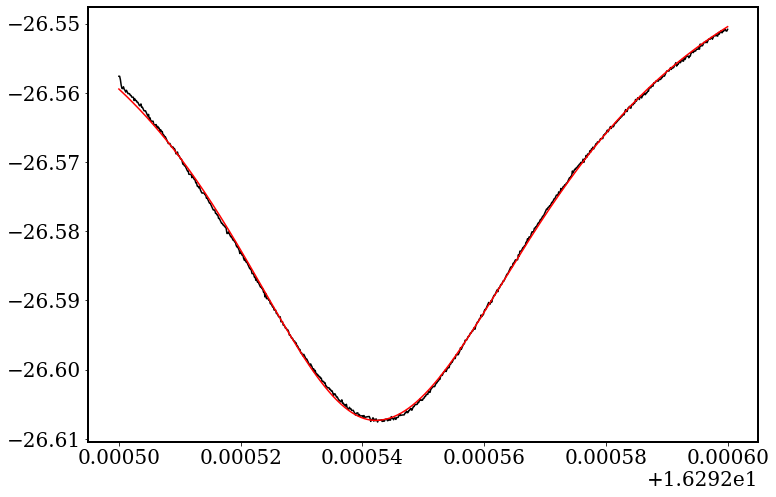

Q_factor =  2.41e+05 +/- 0.0004962016361019669 	 |	 center = 16.292542337108575
RMSE =  0.0003508923478609789
#===================================
Opening  Zoomed_peak53_23:03:08:16:54:58.dat ...


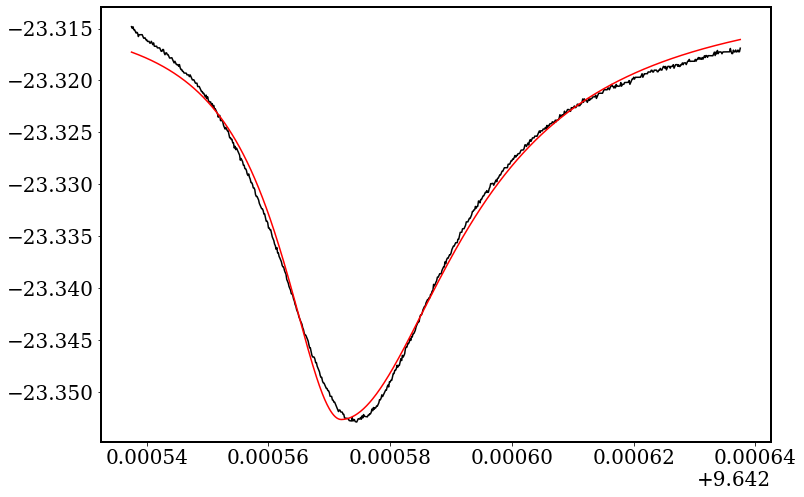

Q_factor =  2.76e+05 +/- 0.002369281047847303 	 |	 center = 9.642571976014896
RMSE =  0.0008239549691792667
#===================================
Opening  Zoomed_peak78_23:03:08:18:19:30.dat ...


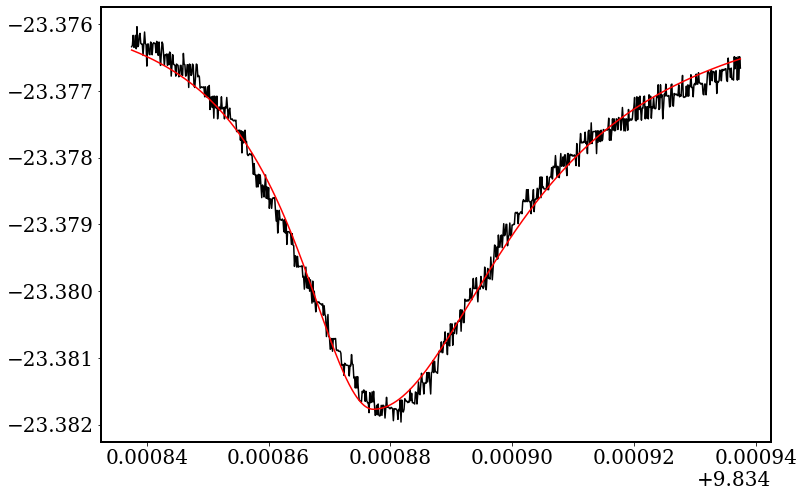

Q_factor =  2.29e+05 +/- 0.003007947132340971 	 |	 center = 9.834877217844959
RMSE =  0.0001662449034990965
#===================================
Opening  Zoomed_peak107_23:03:08:20:55:14.dat ...


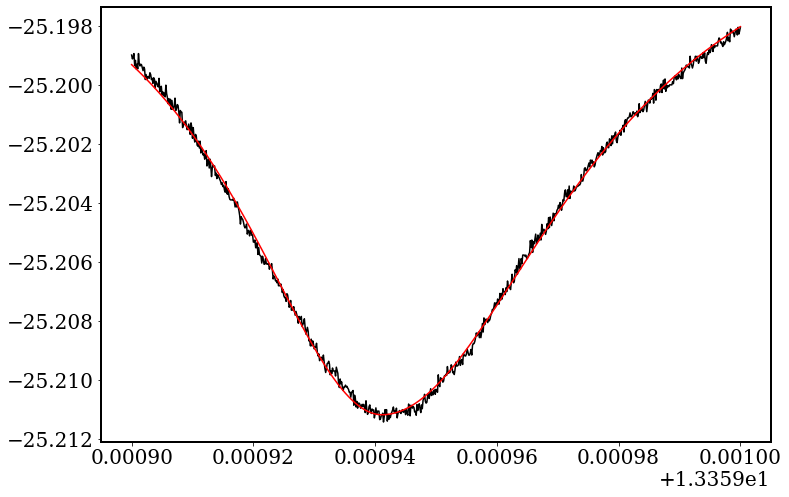

Q_factor =  2.00e+05 +/- 0.0010410513731278009 	 |	 center = 13.359941246203766
RMSE =  0.00017440047338912988
#===================================
Opening  Zoomed_peak60_23:03:08:17:19:13.dat ...


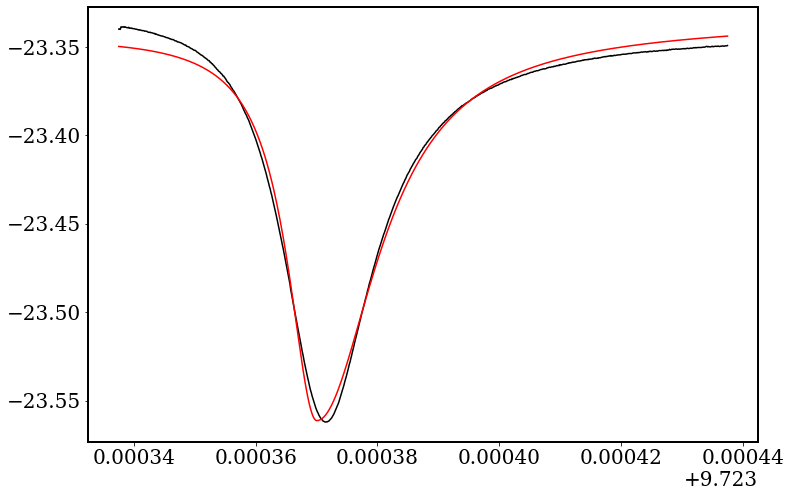

Q_factor =  5.45e+05 +/- 0.0032697145049662138 	 |	 center = 9.723370042934091
RMSE =  0.0054120821200513095
#===================================
Opening  Zoomed_peak100_23:03:08:20:29:23.dat ...


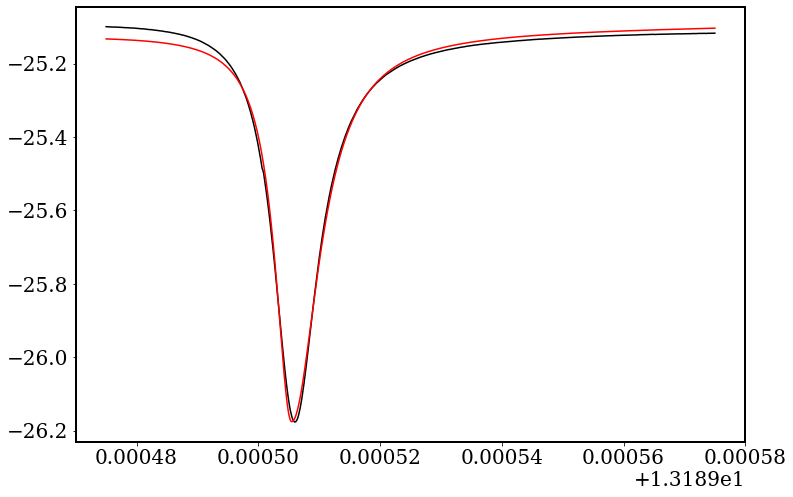

Q_factor =  1.51e+06 +/- 0.002944548824717368 	 |	 center = 13.189505472319617
RMSE =  0.017464867349860094
#===================================
Opening  Zoomed_peak79_23:03:08:18:22:57.dat ...


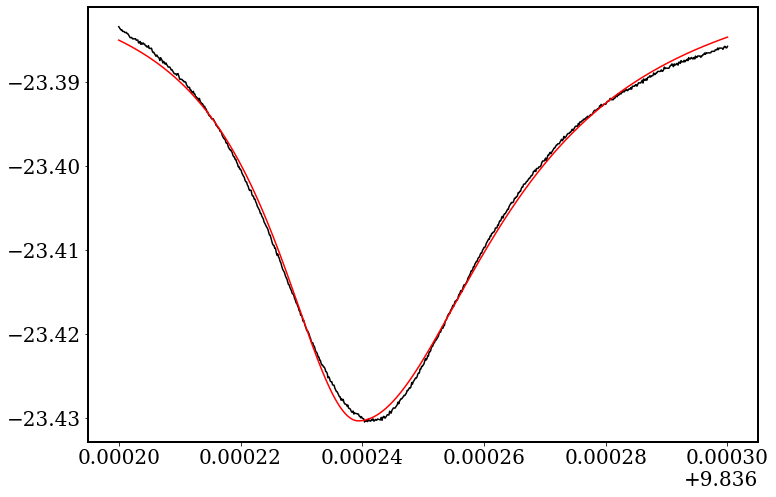

Q_factor =  2.24e+05 +/- 0.0014475083998756347 	 |	 center = 9.836239388198667
RMSE =  0.0006833788382933883
#===================================
Opening  Zoomed_peak124_23:03:08:22:39:08.dat ...


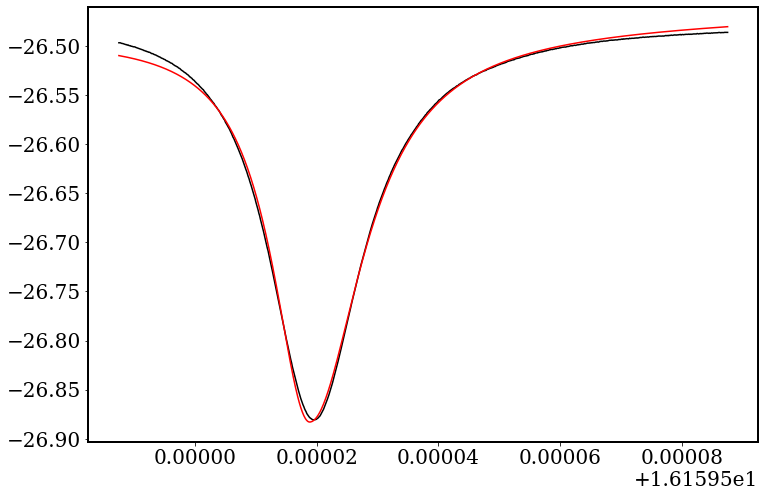

Q_factor =  9.02e+05 +/- 0.0017194496646610533 	 |	 center = 16.15951885952716
RMSE =  0.00490781765219989
#===================================
Opening  Zoomed_peak41_23:03:08:16:02:33.dat ...


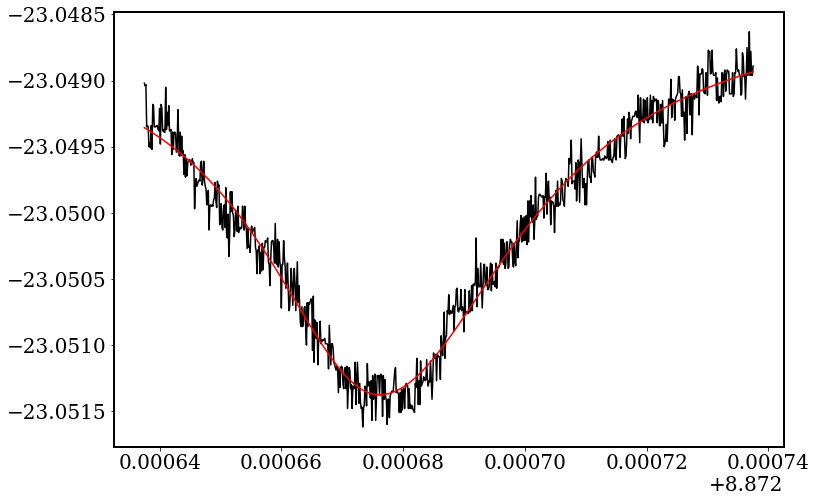

Q_factor =  1.73e+05 +/- 0.0051680679953719985 	 |	 center = 8.872676192941833
RMSE =  0.00012804055533957326
#===================================
Opening  Zoomed_peak110_23:03:08:21:06:06.dat ...


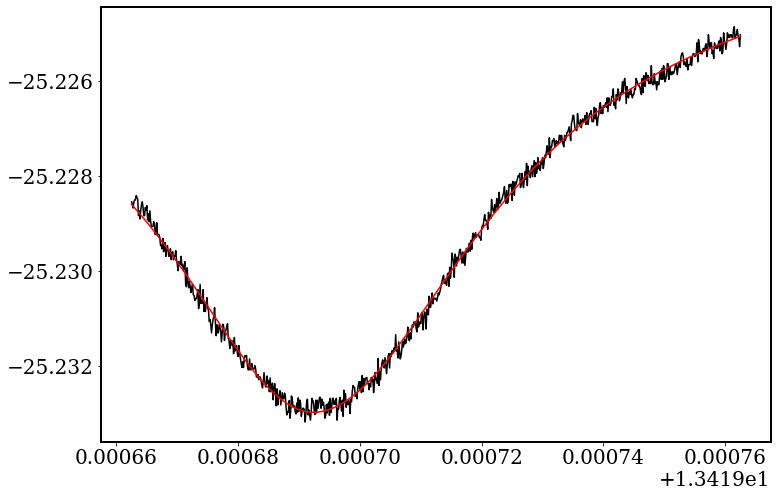

Q_factor =  2.12e+05 +/- 0.0017884100993502084 	 |	 center = 13.419692705367332
RMSE =  0.0001446086146417559
#===================================
Opening  Zoomed_peak55_23:03:08:17:01:52.dat ...


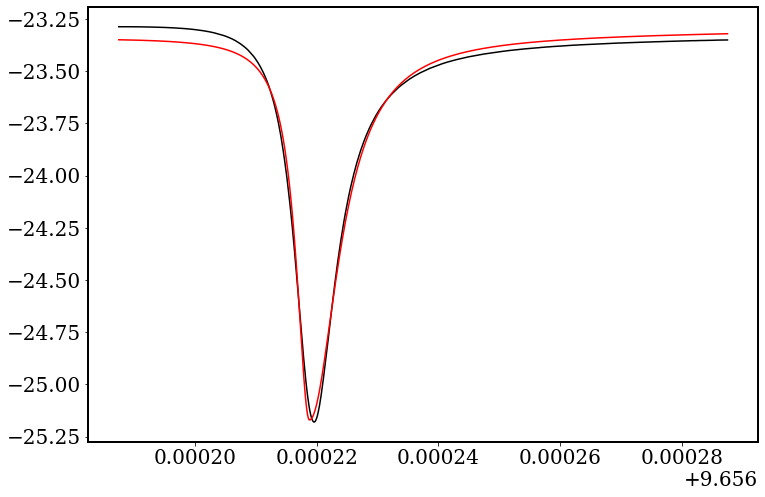

Q_factor =  1.15e+06 +/- 0.0038532740036975525 	 |	 center = 9.656218825183194
RMSE =  0.040845041324009936
#===================================
Opening  Zoomed_peak76_23:03:08:18:12:50.dat ...


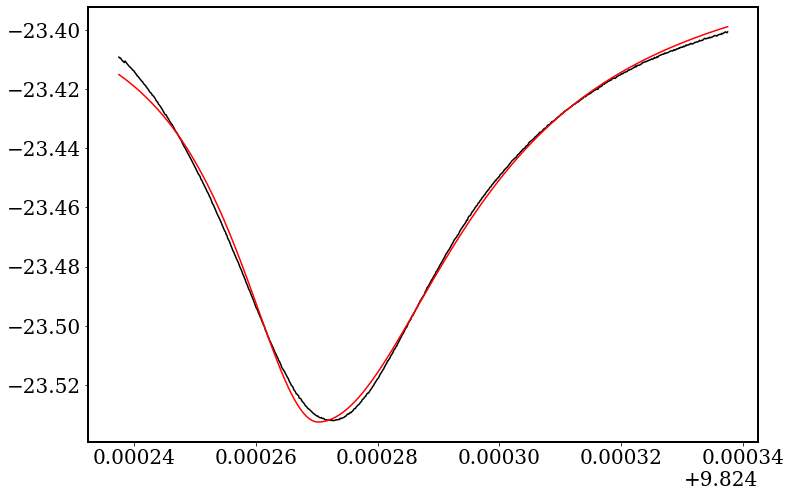

Q_factor =  2.18e+05 +/- 0.0014495748494456155 	 |	 center = 9.8242703052741
RMSE =  0.0019219718729205429
#===================================
Opening  Zoomed_peak2_23:03:08:11:51:28.dat ...


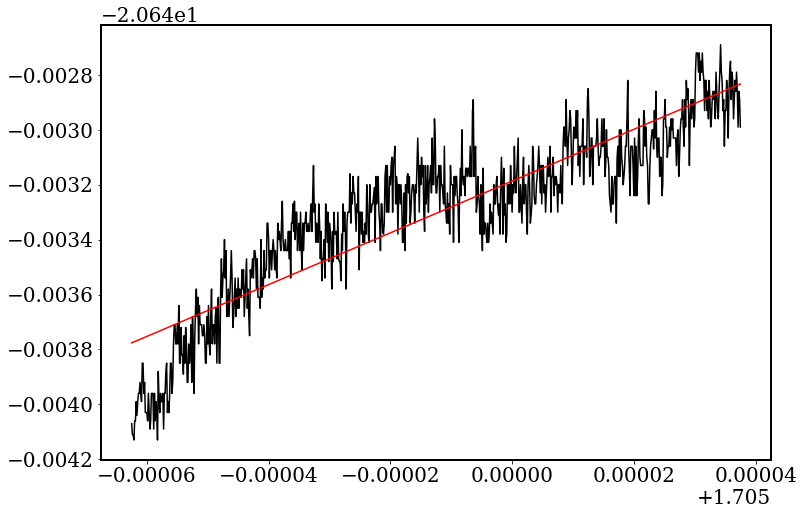

Q_factor =  9.23e+02 +/- 1.6113213983605414e-13 	 |	 center = 1.7049375082043159
RMSE =  0.00013668288035005284
#===================================
Opening  Zoomed_peak116_23:03:08:22:00:42.dat ...


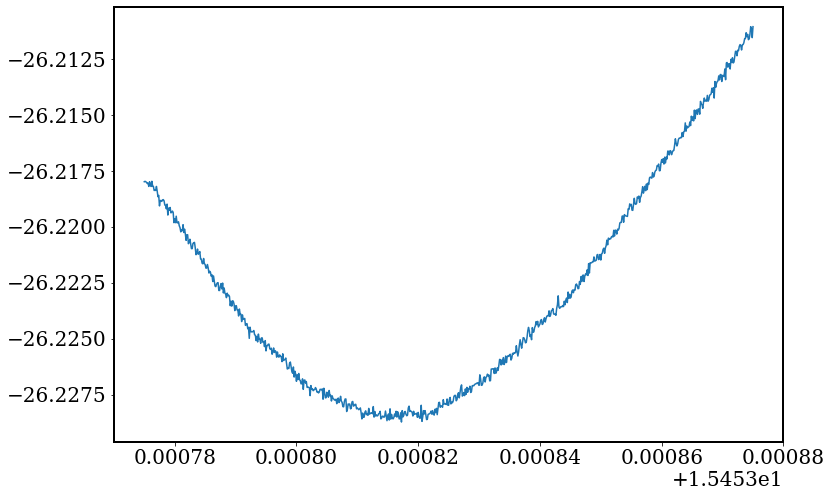

There was a problem during the fit!
#===================================
Opening  Zoomed_peak19_23:03:08:13:57:43.dat ...


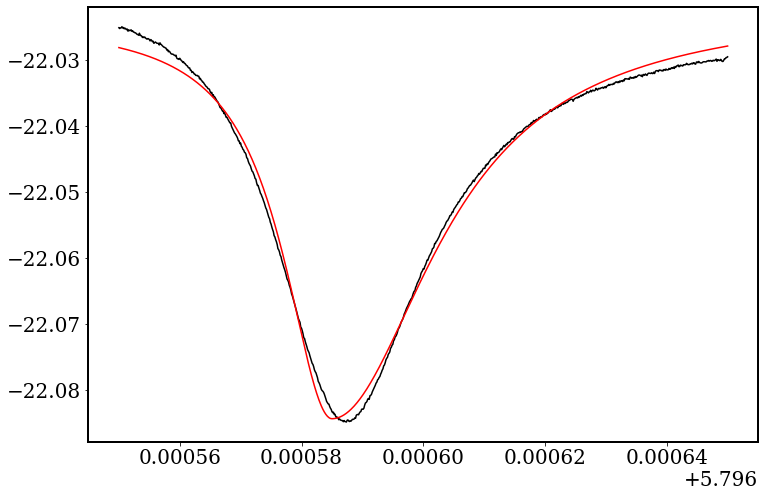

Q_factor =  1.93e+05 +/- 0.002759950212290727 	 |	 center = 5.796585026720398
RMSE =  0.0014518065134797816
#===================================
Opening  Zoomed_peak77_23:03:08:18:16:17.dat ...


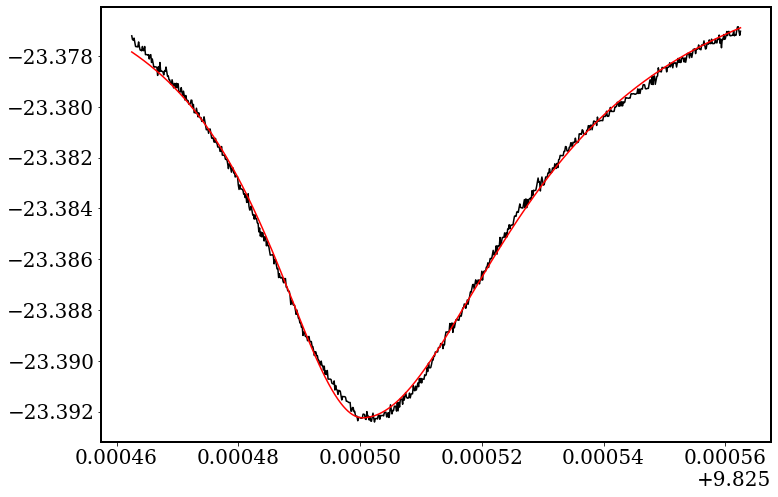

Q_factor =  1.95e+05 +/- 0.0012253625534929095 	 |	 center = 9.82550046942455
RMSE =  0.0002012752930127798
#===================================
Opening  Zoomed_peak29_23:03:08:15:03:04.dat ...


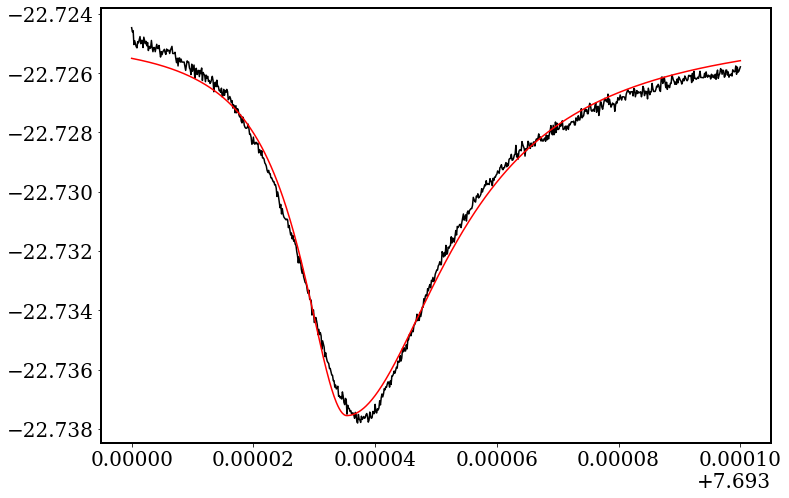

Q_factor =  2.65e+05 +/- 0.002922774652219084 	 |	 center = 7.693035353555318
RMSE =  0.00032795252935679213
#===================================
Opening  Zoomed_peak85_23:03:08:18:44:07.dat ...


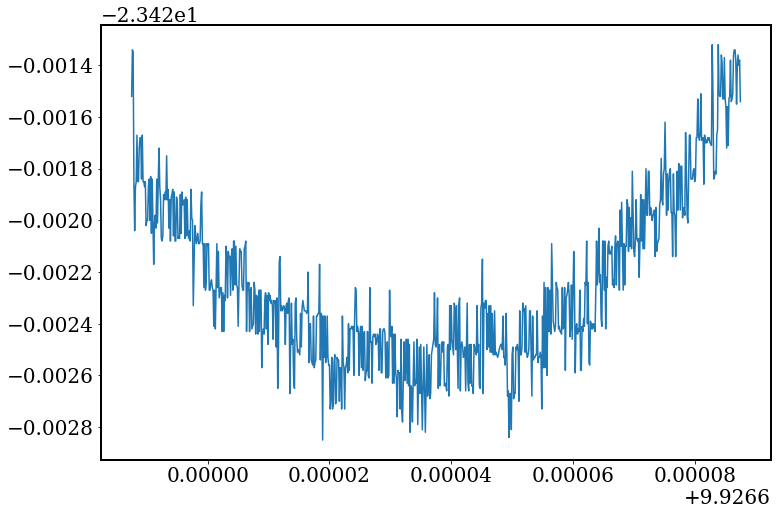

There was a problem during the fit!
#===================================
Opening  Zoomed_peak7_23:03:08:12:33:22.dat ...


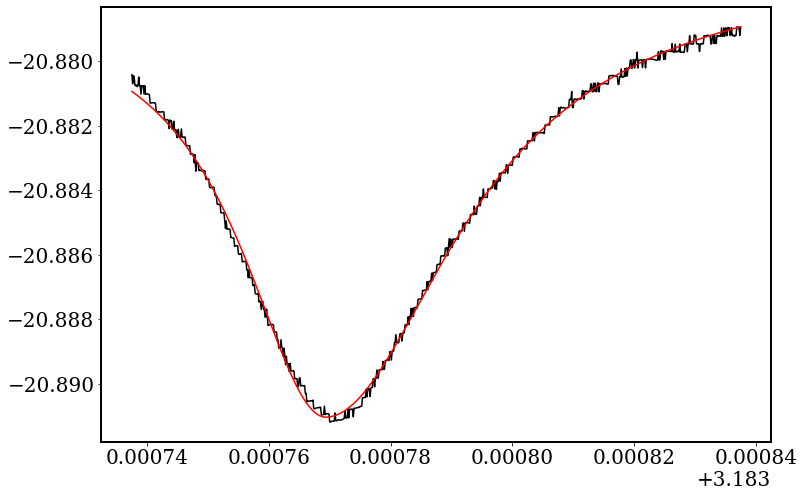

Q_factor =  7.40e+04 +/- 0.0014468776475840006 	 |	 center = 3.1837694288963685
RMSE =  0.00016520137896811675
#===================================
Opening  Zoomed_peak95_23:03:08:19:56:38.dat ...


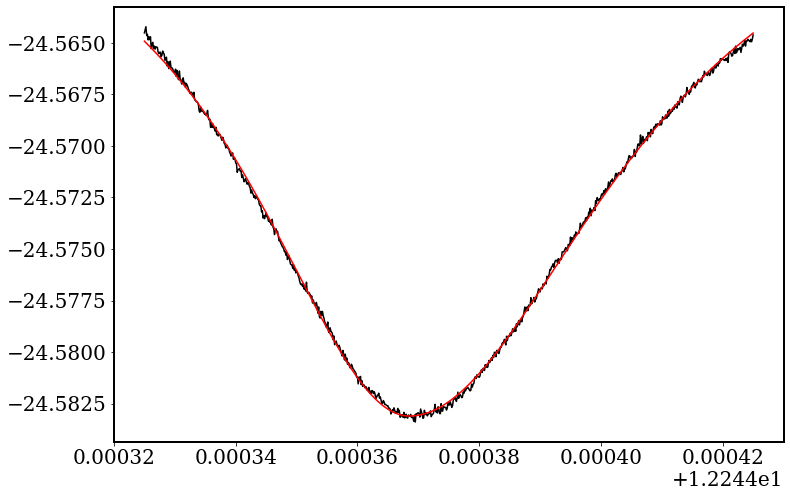

Q_factor =  1.68e+05 +/- 0.0006424723104384294 	 |	 center = 12.24436855293727
RMSE =  0.00017175795941896116
#===================================
Opening  Zoomed_peak118_23:03:08:22:09:40.dat ...


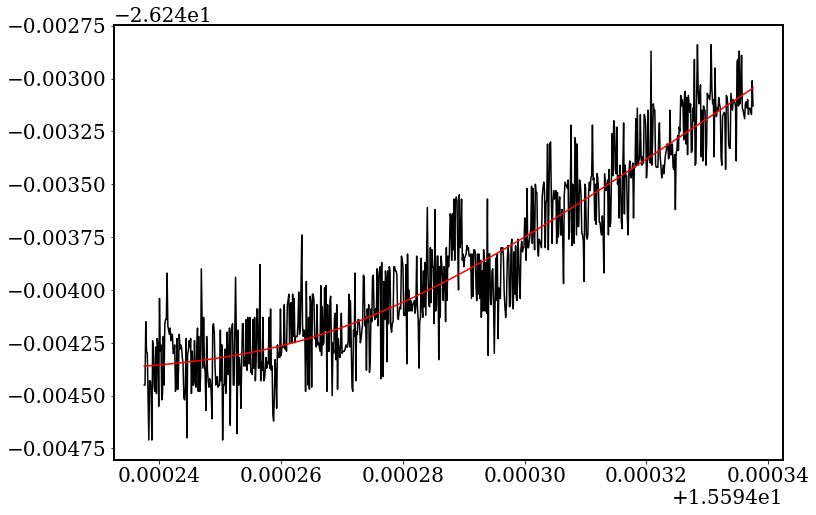

Q_factor =  8.85e+04 +/- 0.12831385360435252 	 |	 center = 15.594272395869497
RMSE =  0.0001567907344265434
#===================================
Opening  Zoomed_peak37_23:03:08:15:47:36.dat ...


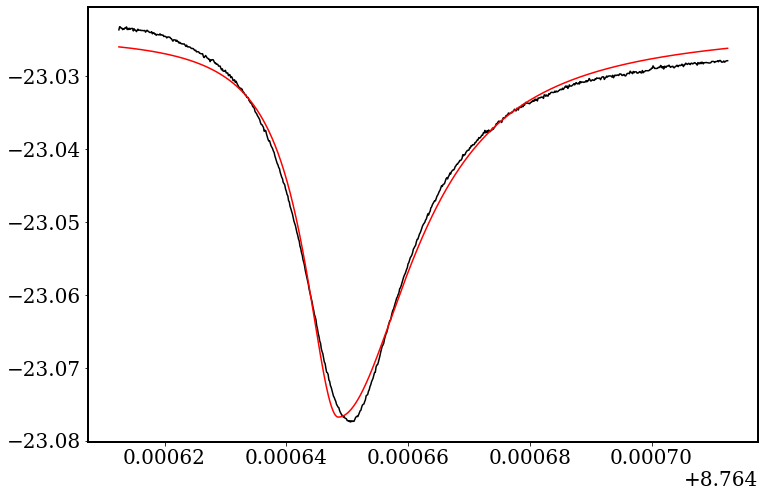

Q_factor =  4.08e+05 +/- 0.0032936454153318136 	 |	 center = 8.764648541348734
RMSE =  0.0014084568780966516
#===================================
Opening  Zoomed_peak20_23:03:08:14:01:20.dat ...


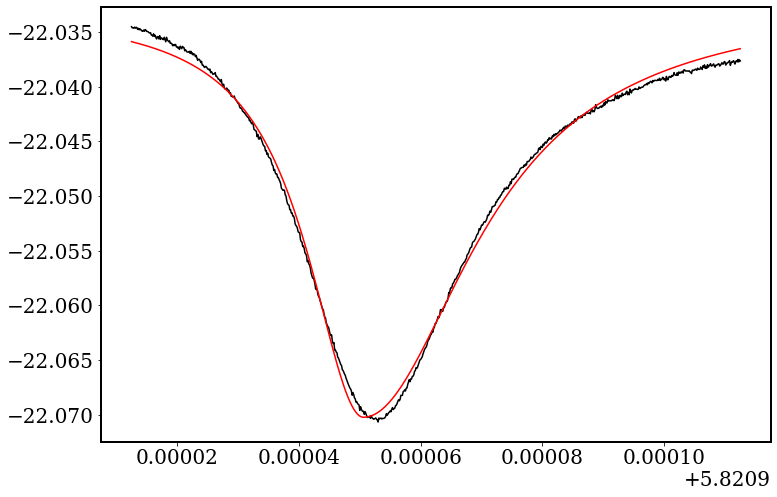

Q_factor =  1.76e+05 +/- 0.0022453805045277776 	 |	 center = 5.820950628426724
RMSE =  0.0007303715553021449
#===================================
Opening  Zoomed_peak31_23:03:08:15:11:20.dat ...


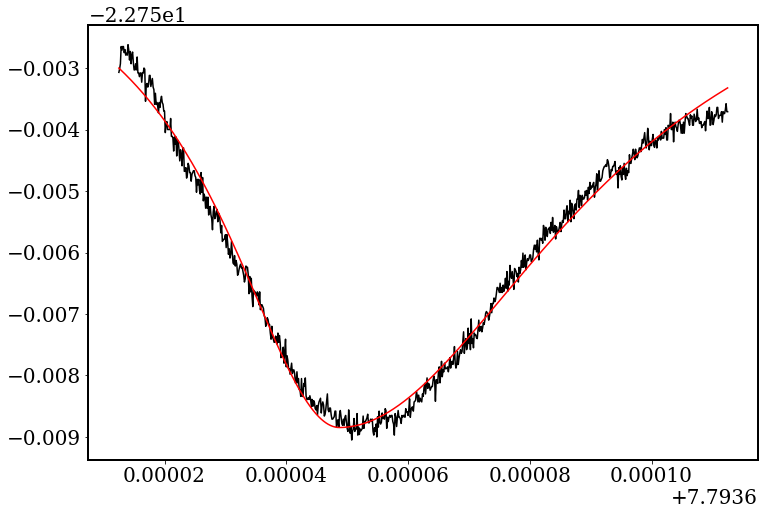

Q_factor =  1.12e+05 +/- 0.0023121385176675387 	 |	 center = 7.79364878406629
RMSE =  0.0001897118653994685
#===================================
Opening  Zoomed_peak40_23:03:08:15:58:45.dat ...


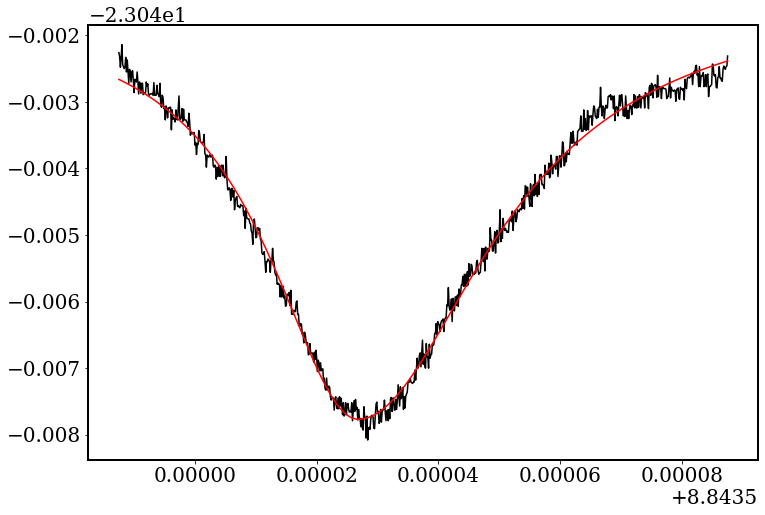

Q_factor =  2.00e+05 +/- 0.002713545057081378 	 |	 center = 8.84352686090185
RMSE =  0.00014592843510463996
#===================================
Opening  Zoomed_peak80_23:03:08:18:26:55.dat ...


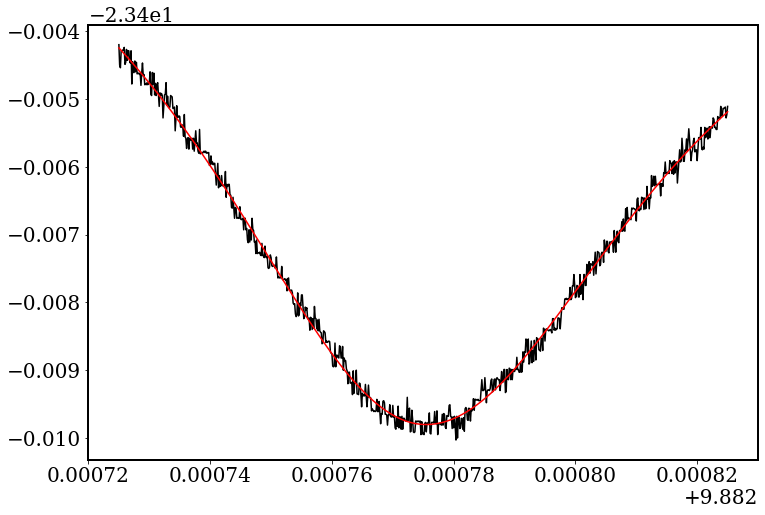

Q_factor =  1.11e+05 +/- 0.0012671578253953275 	 |	 center = 9.882774566938545
RMSE =  0.00011871288094471434
#===================================
Opening  Zoomed_peak97_23:03:08:20:04:14.dat ...


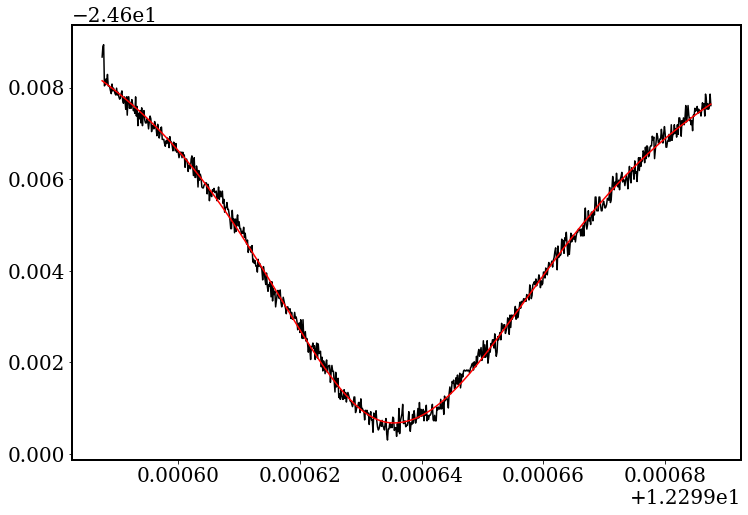

Q_factor =  1.79e+05 +/- 0.001491792072988944 	 |	 center = 12.299635244524119
RMSE =  0.00014655922773933118
#===================================
Opening  Zoomed_peak30_23:03:08:15:07:43.dat ...


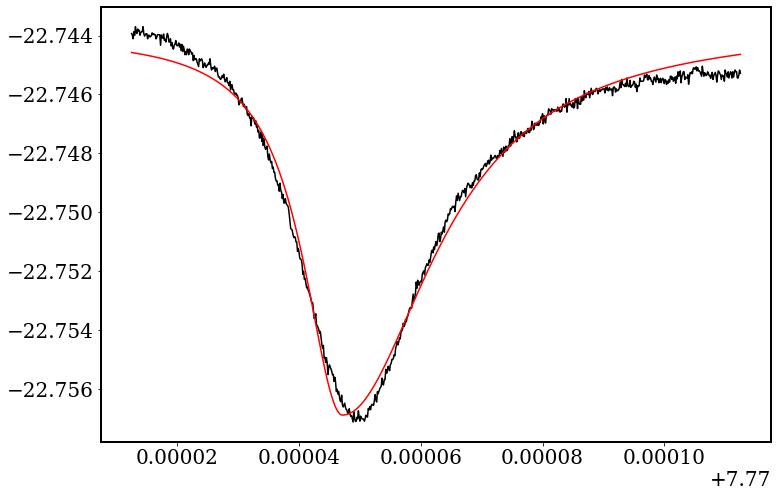

Q_factor =  2.99e+05 +/- 0.003575777123521337 	 |	 center = 7.770047149368061
RMSE =  0.0003988040581314181
#===================================
Opening  Zoomed_peak73_23:03:08:18:02:44.dat ...


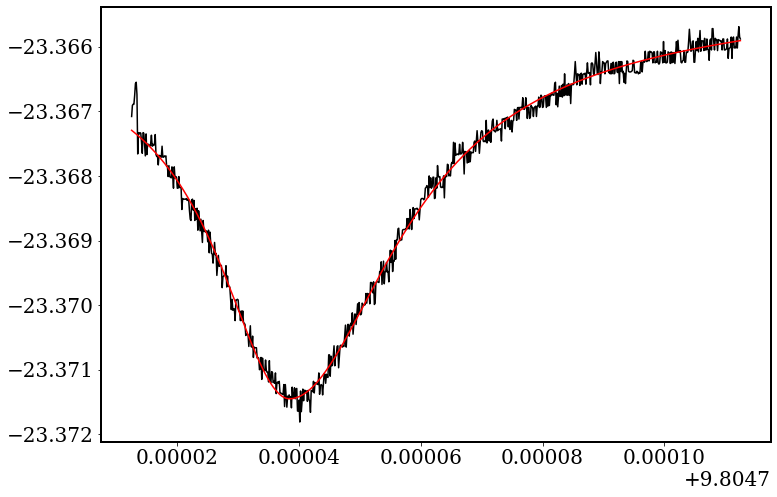

Q_factor =  2.74e+05 +/- 0.002838147607733307 	 |	 center = 9.804738541839752
RMSE =  0.00013658091849899265
#===================================
Opening  Zoomed_peak15_23:03:08:13:35:08.dat ...


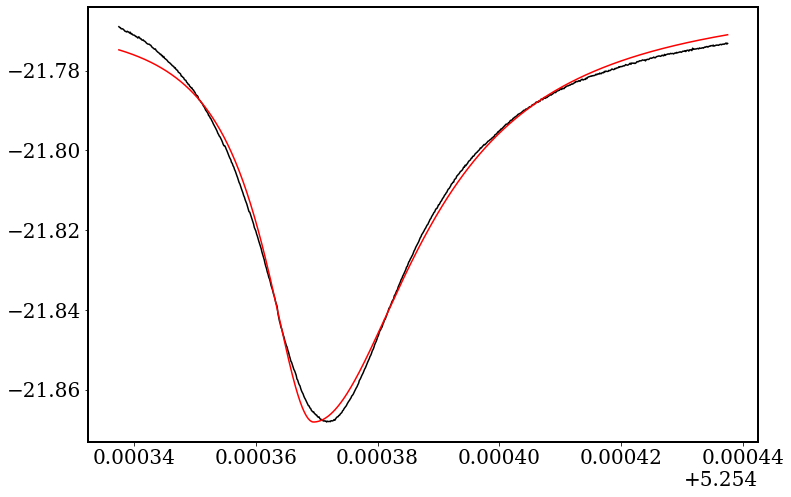

Q_factor =  1.75e+05 +/- 0.0023285216312875128 	 |	 center = 5.254369507656932
RMSE =  0.0020541334811624654
#===================================
Opening  Zoomed_peak32_23:03:08:15:15:49.dat ...


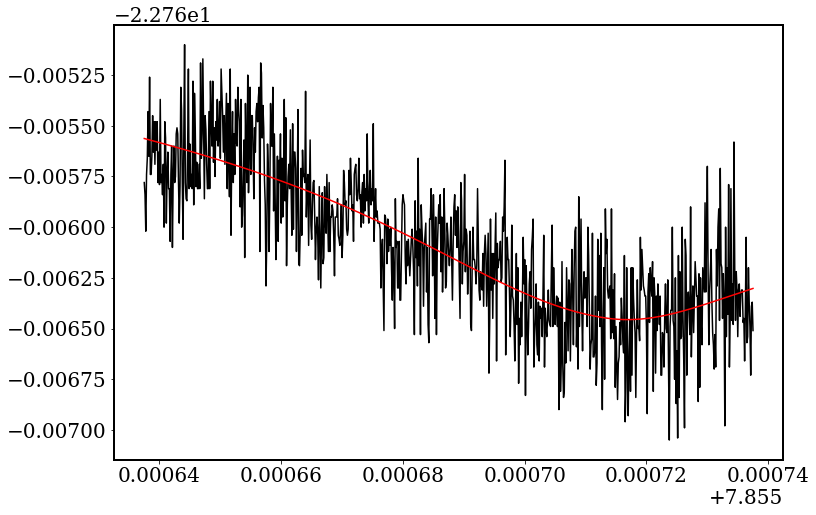

Q_factor =  1.00e+05 +/- 0.06397189696849381 	 |	 center = 7.855713546289103
RMSE =  0.00022951756838820108
#===================================
Opening  Zoomed_peak106_23:03:08:20:51:47.dat ...


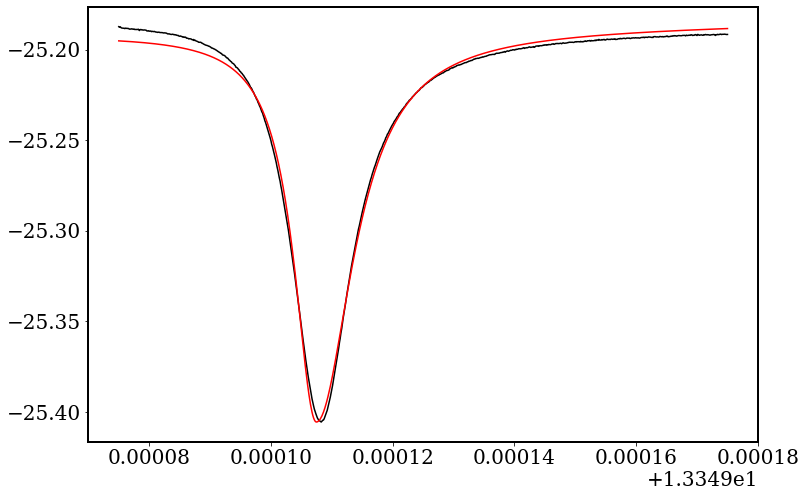

Q_factor =  1.14e+06 +/- 0.00272034088648478 	 |	 center = 13.349107467030354
RMSE =  0.0036765446175247717
#===================================
Opening  Zoomed_peak108_23:03:08:20:58:51.dat ...


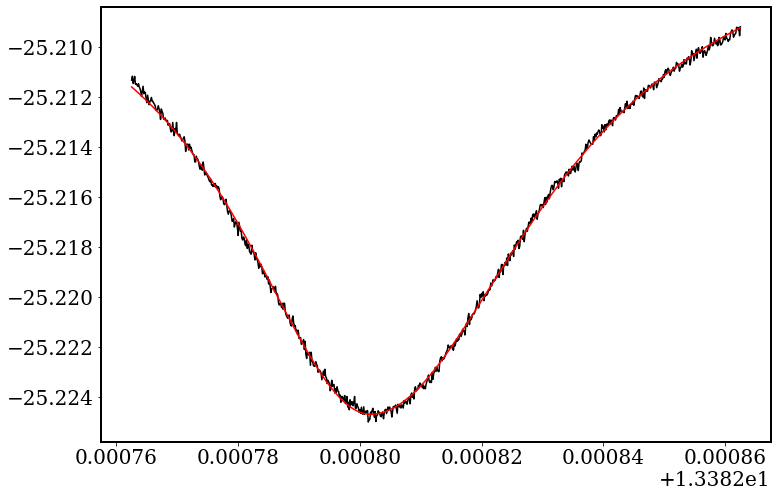

Q_factor =  2.20e+05 +/- 0.0008931459273455692 	 |	 center = 13.382801888302547
RMSE =  0.0001581461820493766
#===================================
Opening  Zoomed_peak47_23:03:08:16:33:42.dat ...


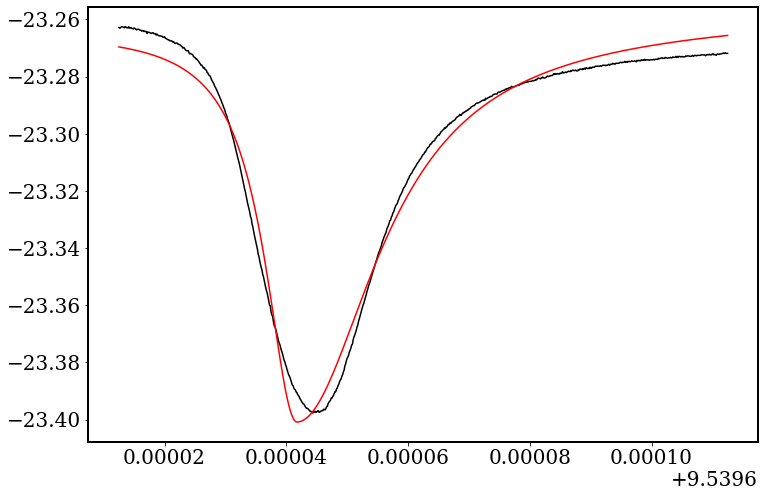

Q_factor =  4.27e+05 +/- 0.004602897079027959 	 |	 center = 9.539641760756632
RMSE =  0.005352644185953994
#===================================
Opening  Zoomed_peak89_23:03:08:19:26:08.dat ...


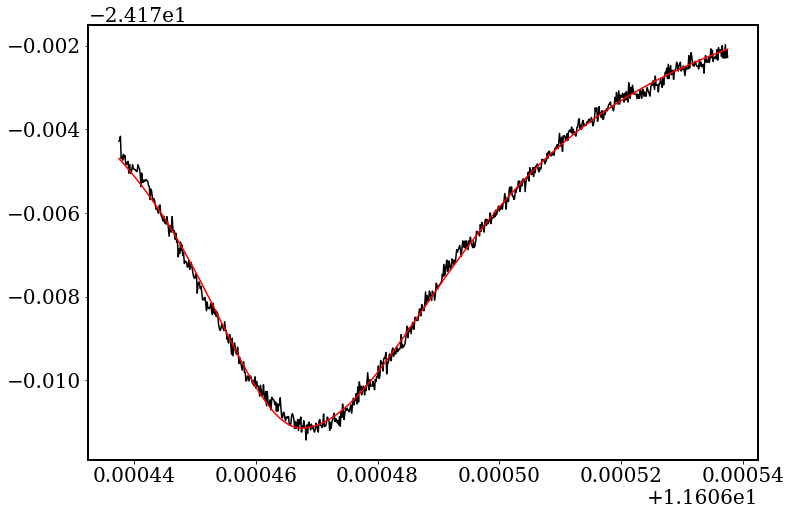

Q_factor =  2.04e+05 +/- 0.0015083646186313466 	 |	 center = 11.606467637576424
RMSE =  0.00014597040701720693
#===================================
Opening  Zoomed_peak26_23:03:08:14:41:51.dat ...


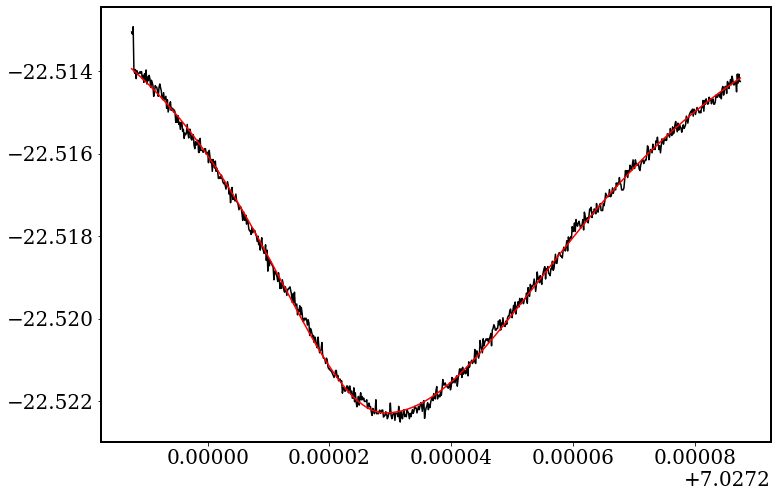

Q_factor =  9.76e+04 +/- 0.0011198350661014897 	 |	 center = 7.027229183116417
RMSE =  0.00013338039605079828
#===================================
Opening  Zoomed_peak8_23:03:08:12:36:49.dat ...


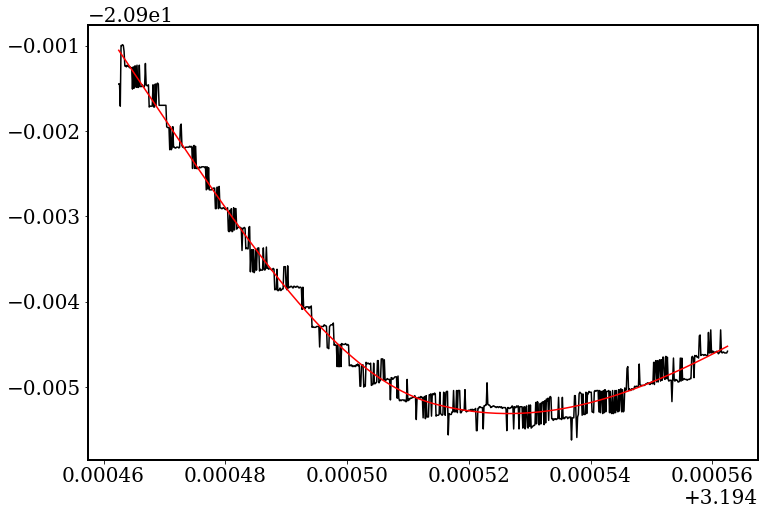

Q_factor =  1.58e+04 +/- 0.014718411962208256 	 |	 center = 3.1945145441432676
RMSE =  0.00012641006874956543
#===================================
Opening  Zoomed_peak13_23:03:08:13:28:42.dat ...


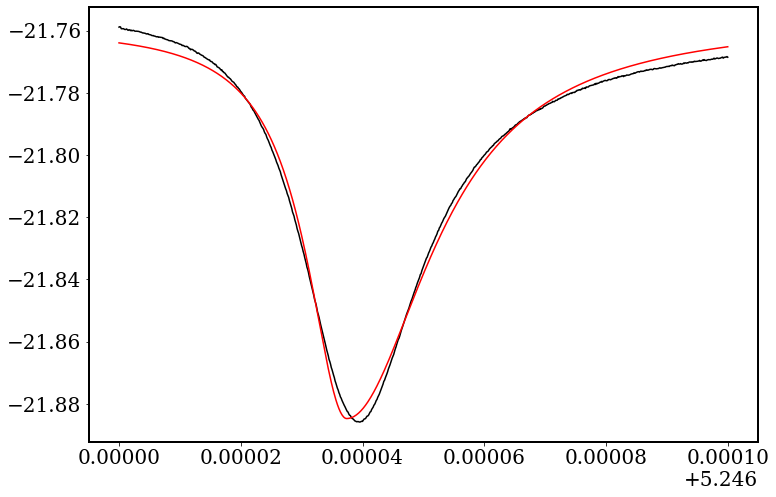

Q_factor =  2.14e+05 +/- 0.002693129567703406 	 |	 center = 5.246037408476165
RMSE =  0.002822371877767397
#===================================
Opening  Zoomed_peak56_23:03:08:17:05:19.dat ...


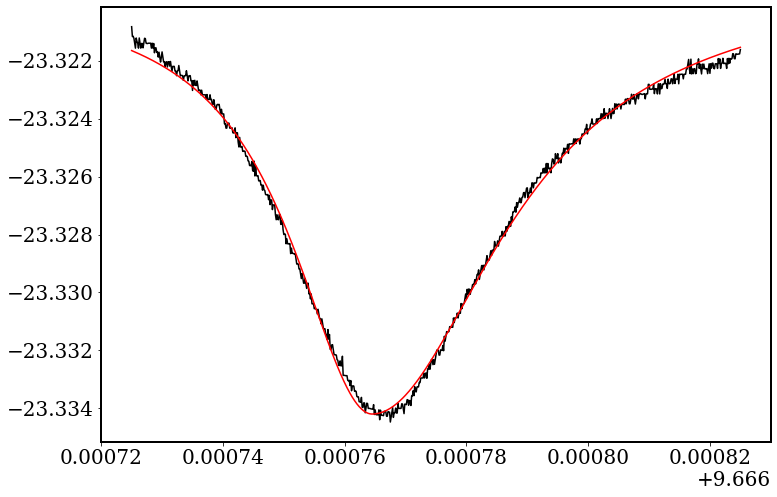

Q_factor =  2.31e+05 +/- 0.0018649202309926616 	 |	 center = 9.666764544704572
RMSE =  0.00023793853163253504
#===================================
Opening  Zoomed_peak61_23:03:08:17:22:26.dat ...


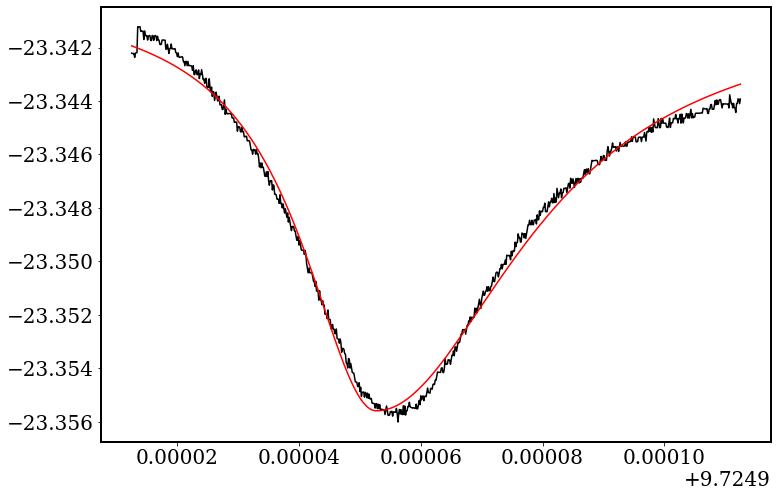

Q_factor =  2.20e+05 +/- 0.002578565083732729 	 |	 center = 9.724952639692628
RMSE =  0.0003652122488340153
#===================================
Opening  Zoomed_peak11_23:03:08:12:47:19.dat ...


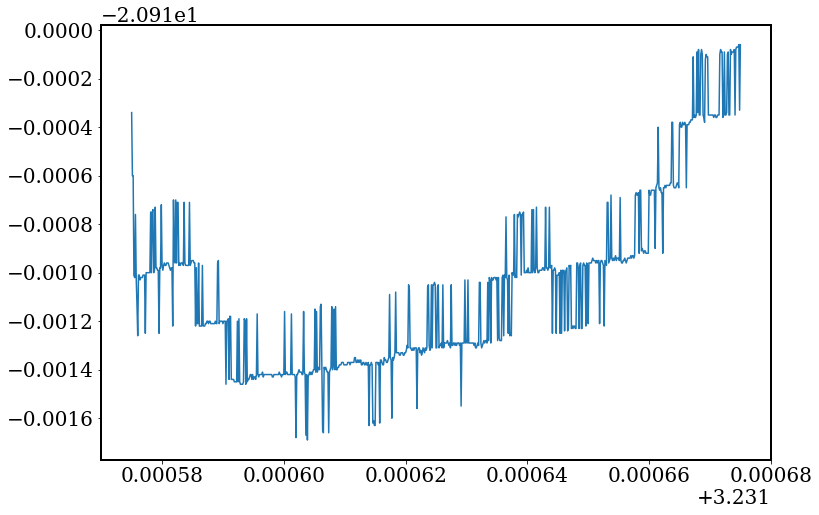

There was a problem during the fit!
#===================================
Opening  Zoomed_peak112_23:03:08:21:13:20.dat ...


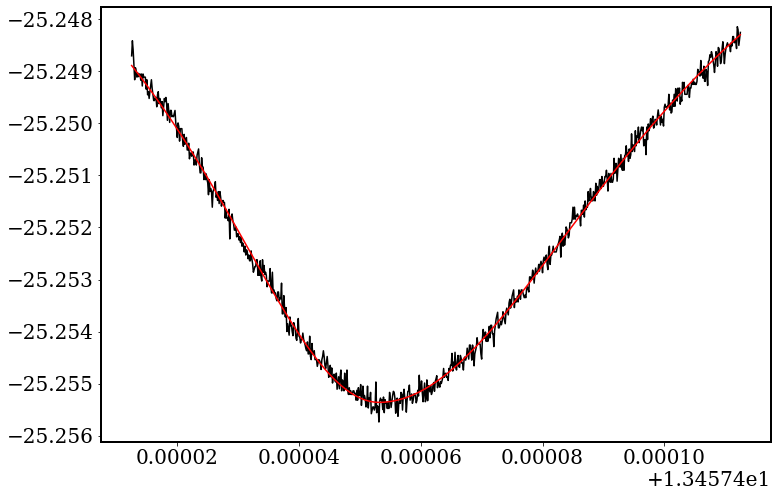

Q_factor =  1.50e+05 +/- 0.0010492730165234207 	 |	 center = 13.457453308883384
RMSE =  0.00013448972055022095
#===================================
Opening  Zoomed_peak69_23:03:08:17:49:06.dat ...


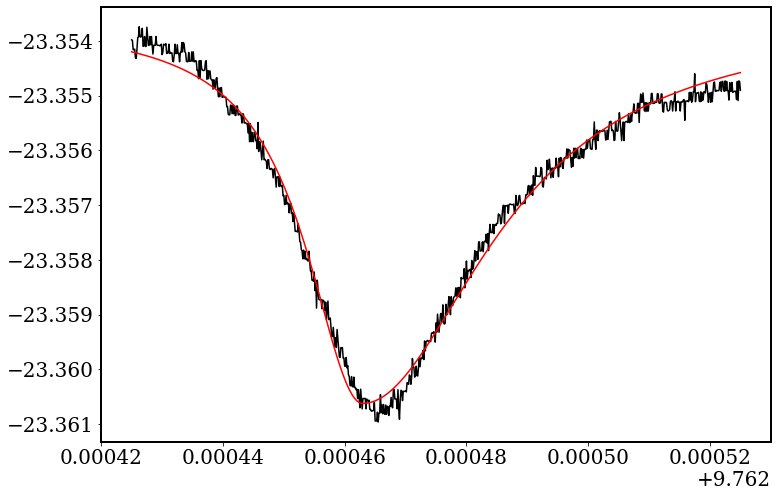

Q_factor =  2.68e+05 +/- 0.003200484649867794 	 |	 center = 9.762462946166433
RMSE =  0.0002061858202321388
#===================================
Opening  Zoomed_peak114_23:03:08:21:20:55.dat ...


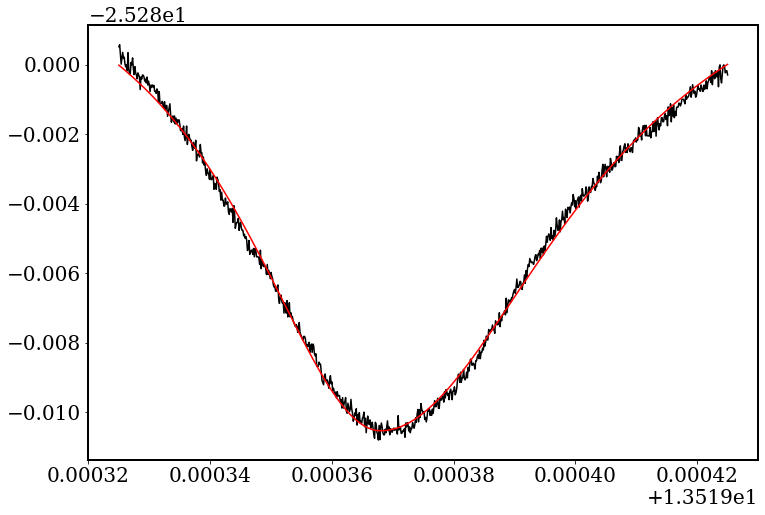

Q_factor =  2.07e+05 +/- 0.0014565960211780696 	 |	 center = 13.519368042603062
RMSE =  0.00020093098730054586
#===================================
Opening  Zoomed_peak21_23:03:08:14:05:08.dat ...


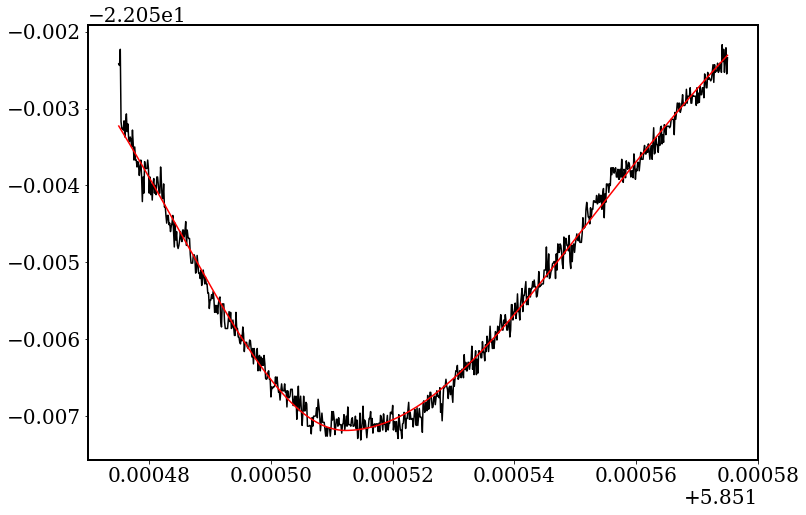

Q_factor =  5.07e+04 +/- 0.0017508183081324424 	 |	 center = 5.851512539127389
RMSE =  0.0001348722409330903
#===================================
Opening  Zoomed_peak44_23:03:08:16:23:04.dat ...


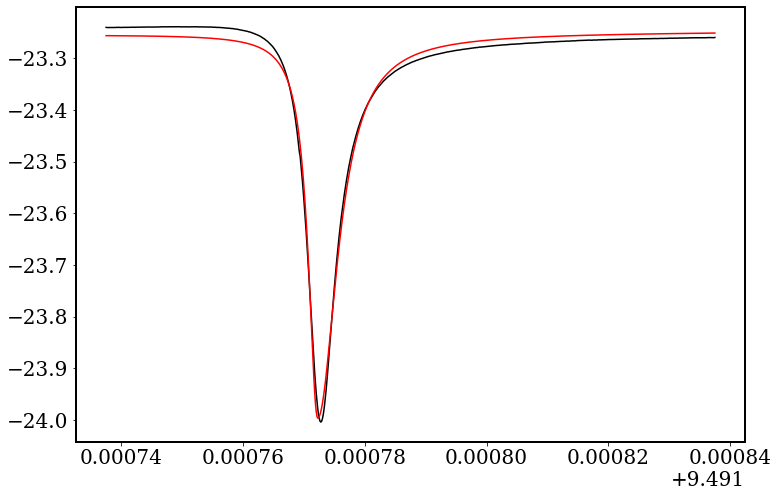

Q_factor =  1.65e+06 +/- 0.004072153236227345 	 |	 center = 9.491772252625275
RMSE =  0.014724468398249185
#===================================
Opening  Zoomed_peak117_23:03:08:22:05:22.dat ...


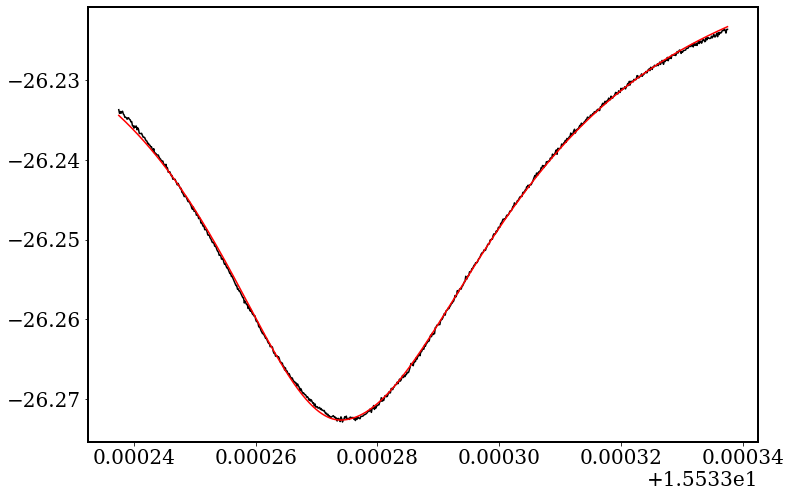

Q_factor =  2.64e+05 +/- 0.0005368323224372305 	 |	 center = 15.533274124327864
RMSE =  0.0002900776691899251
#===================================
Opening  Zoomed_peak109_23:03:08:21:02:29.dat ...


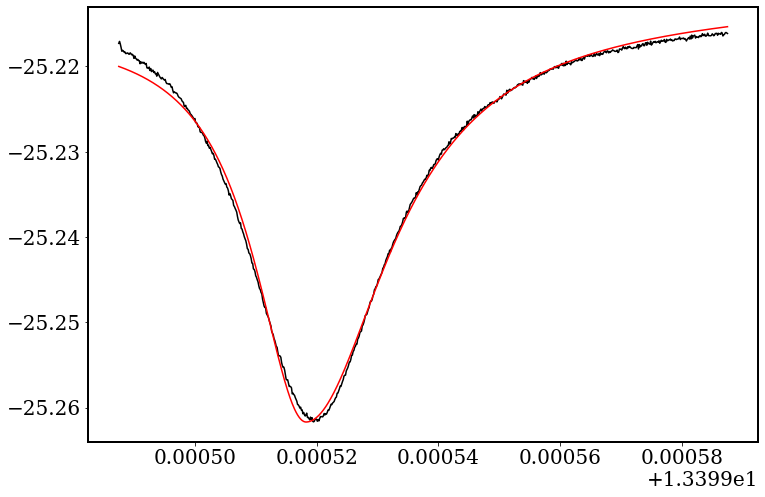

Q_factor =  4.99e+05 +/- 0.0019766188510732096 	 |	 center = 13.399518297040098
RMSE =  0.0007495943271986813
#===================================
Opening  Zoomed_peak28_23:03:08:14:59:37.dat ...


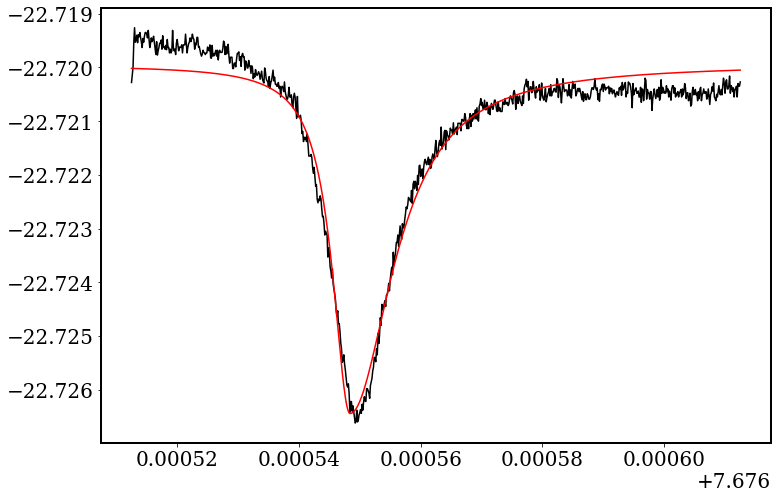

Q_factor =  6.43e+05 +/- 0.006957884267659884 	 |	 center = 7.676548401470647
RMSE =  0.0003058856461951314
#===================================
Opening  Zoomed_peak87_23:03:08:19:01:31.dat ...


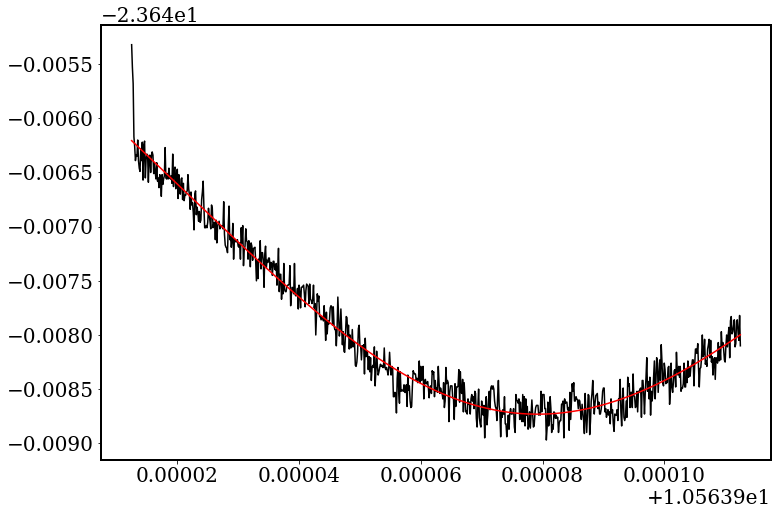

Q_factor =  5.46e+04 +/- 0.04107755052018527 	 |	 center = 10.563976322649927
RMSE =  0.00012773673504595253
#===================================
Opening  Zoomed_peak131_23:03:08:23:04:46.dat ...


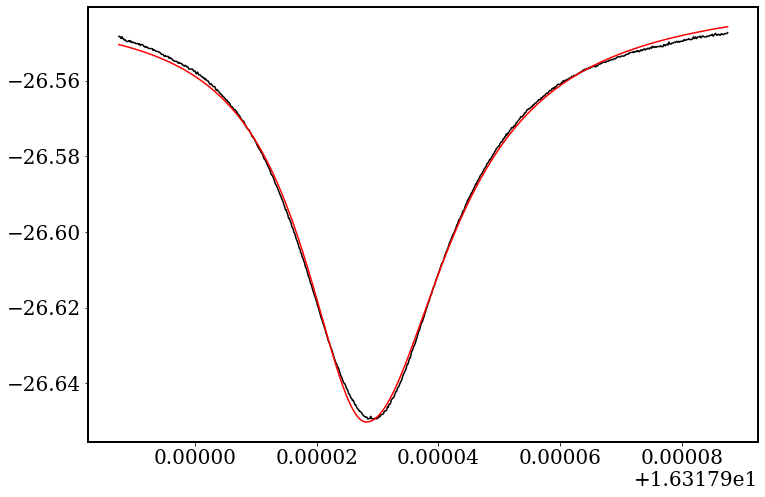

Q_factor =  5.70e+05 +/- 0.0012844623072411525 	 |	 center = 16.317928175835313
RMSE =  0.001129097860503013
#===================================
Opening  Zoomed_peak101_23:03:08:20:33:41.dat ...


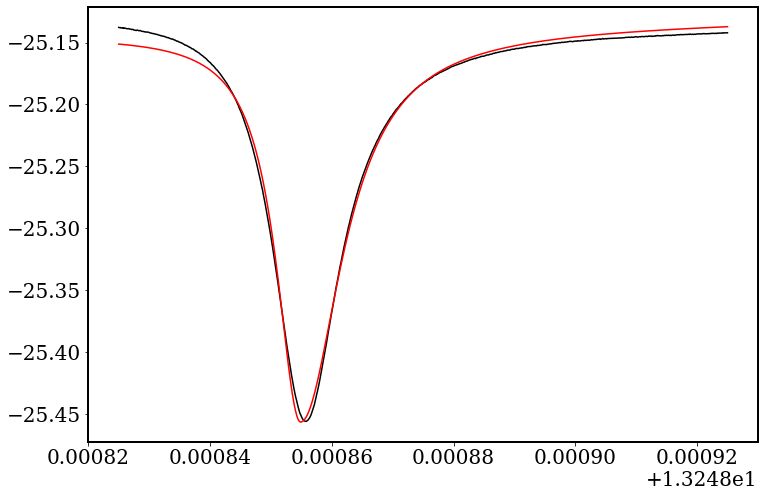

Q_factor =  1.02e+06 +/- 0.0028090876383667506 	 |	 center = 13.248854874586183
RMSE =  0.005814054165843277
#===================================
Opening  Zoomed_peak83_23:03:08:18:37:02.dat ...


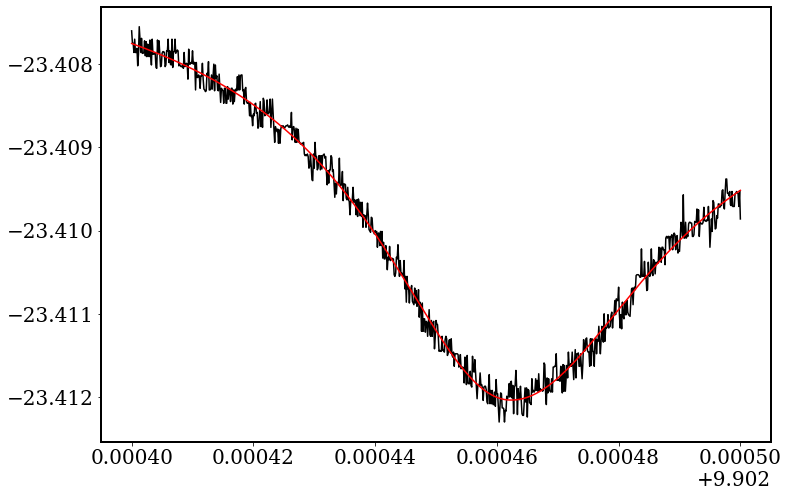

Q_factor =  1.75e+05 +/- 0.003000210971165964 	 |	 center = 9.902461657062489
RMSE =  0.00012520993263770108
#===================================
Opening  Zoomed_peak92_23:03:08:19:44:55.dat ...


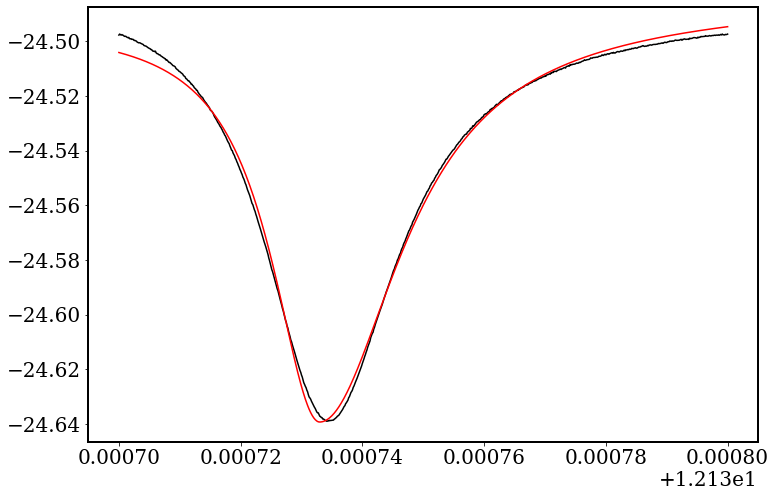

Q_factor =  4.70e+05 +/- 0.002179914771195927 	 |	 center = 12.130733018024443
RMSE =  0.002596650728587252
#===================================
Opening  Zoomed_peak63_23:03:08:17:29:06.dat ...


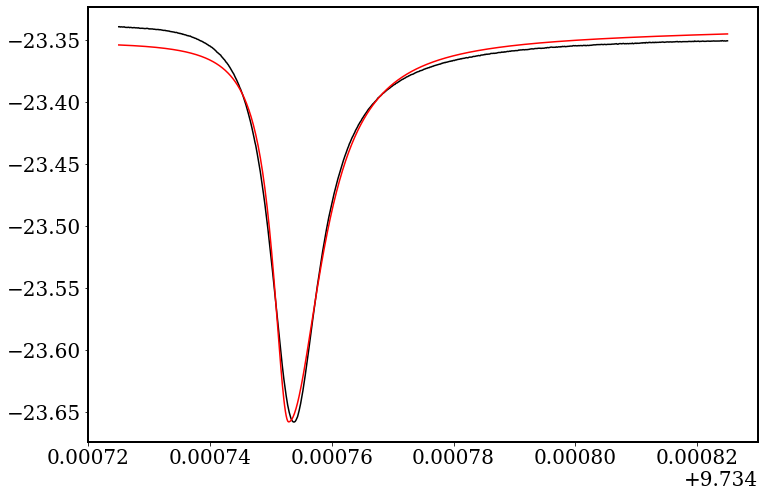

Q_factor =  1.01e+06 +/- 0.003981740541383017 	 |	 center = 9.73475290044332
RMSE =  0.007423311636218551
#===================================
Opening  Zoomed_peak99_23:03:08:20:25:45.dat ...


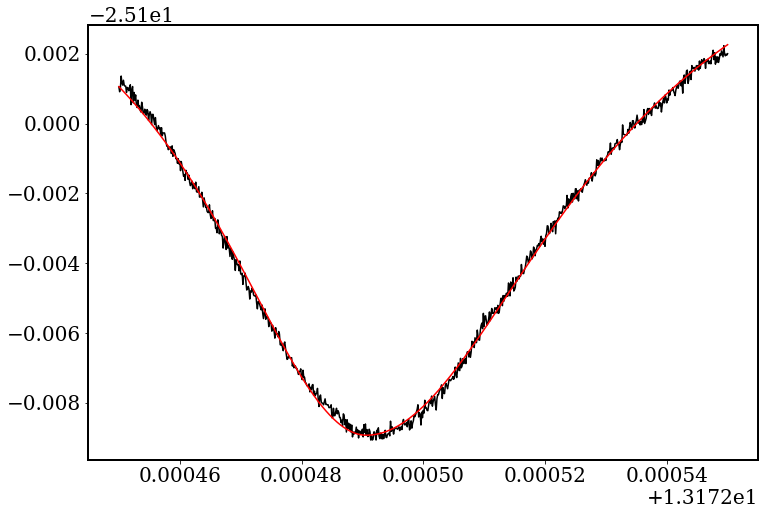

Q_factor =  1.84e+05 +/- 0.001016347909838512 	 |	 center = 13.172490789606558
RMSE =  0.00015492199511283038
#===================================
Opening  Zoomed_peak137_23:03:08:23:26:40.dat ...


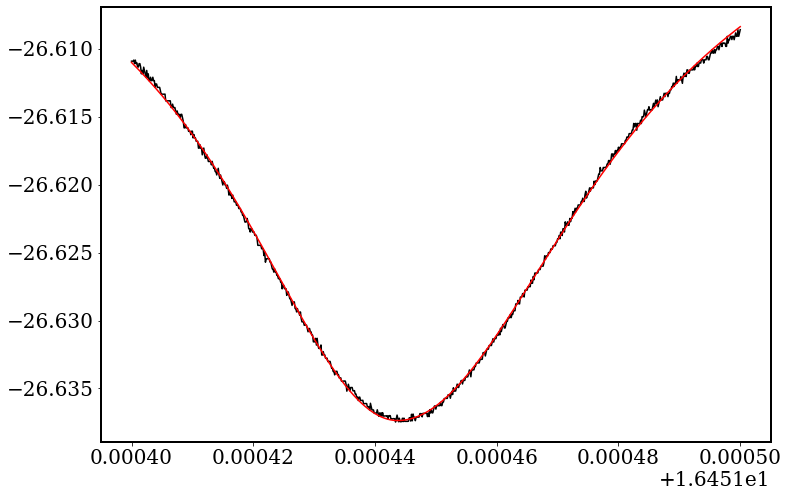

Q_factor =  2.25e+05 +/- 0.0005408341396911601 	 |	 center = 16.451443830552833
RMSE =  0.00021738030244294686
#===================================
Opening  Zoomed_peak16_23:03:08:13:45:39.dat ...


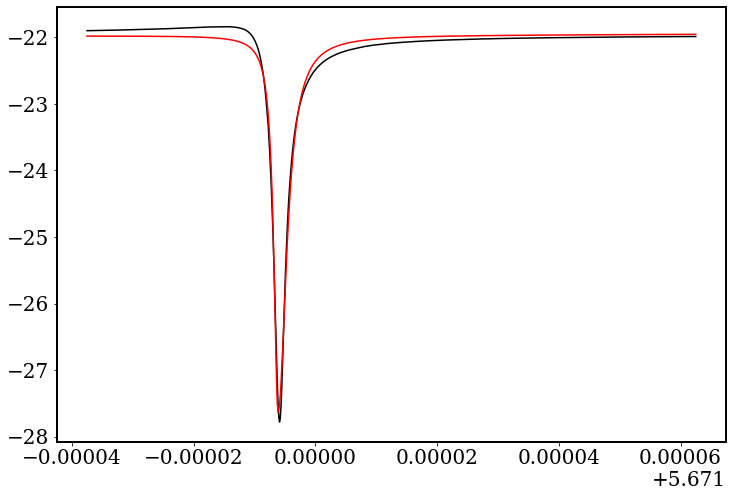

Q_factor =  2.26e+06 +/- 0.005529819340283934 	 |	 center = 5.670993889381822
RMSE =  0.10105442881061827
#===================================
Opening  Zoomed_peak119_23:03:08:22:13:17.dat ...


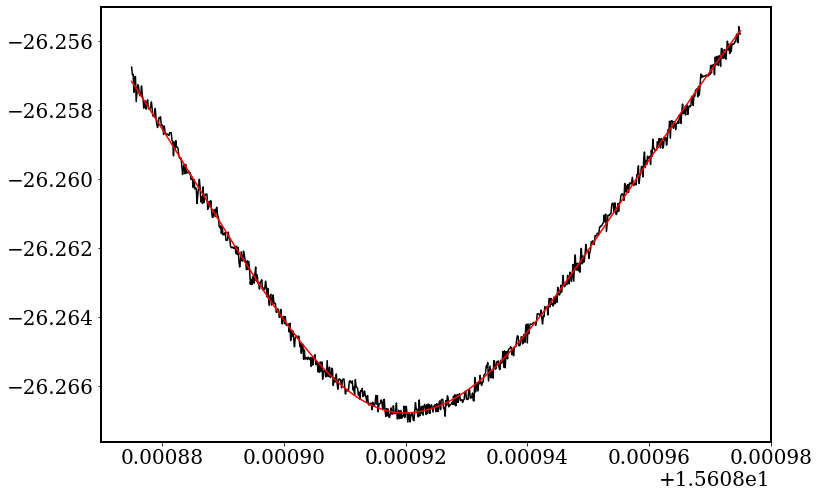

Q_factor =  1.28e+05 +/- 0.0009967825390086338 	 |	 center = 15.608919982038302
RMSE =  0.00016596514479398473
#===================================
Opening  Zoomed_peak126_23:03:08:22:46:40.dat ...


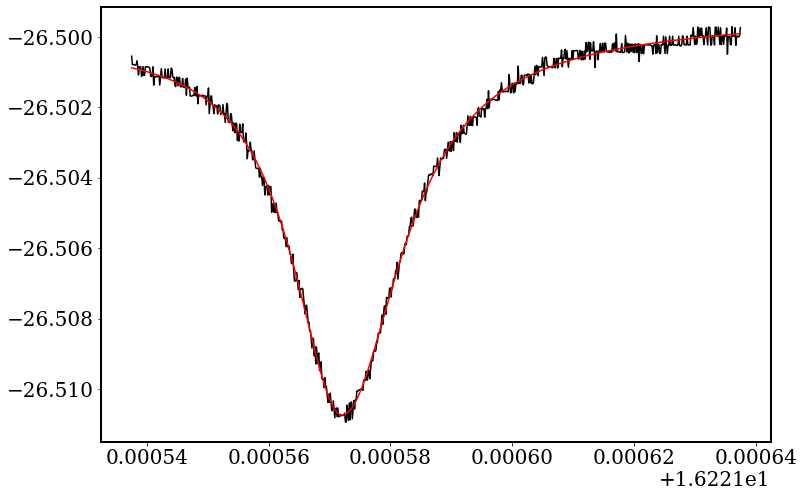

Q_factor =  7.53e+05 +/- 0.0020252348058219243 	 |	 center = 16.221572111884125
RMSE =  0.0001635053087342515
#===================================
Opening  Zoomed_peak81_23:03:08:18:30:22.dat ...


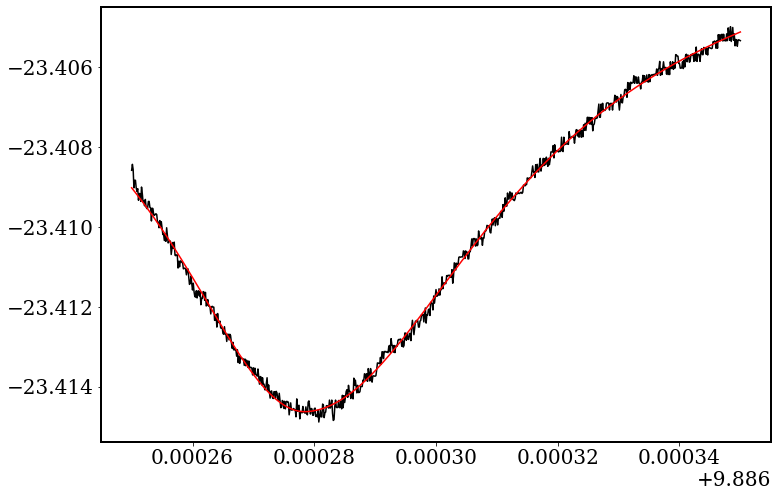

Q_factor =  1.50e+05 +/- 0.0013082288006452964 	 |	 center = 9.886278726797713
RMSE =  0.00013631283922113644
#===================================
Opening  Zoomed_peak102_23:03:08:20:37:08.dat ...


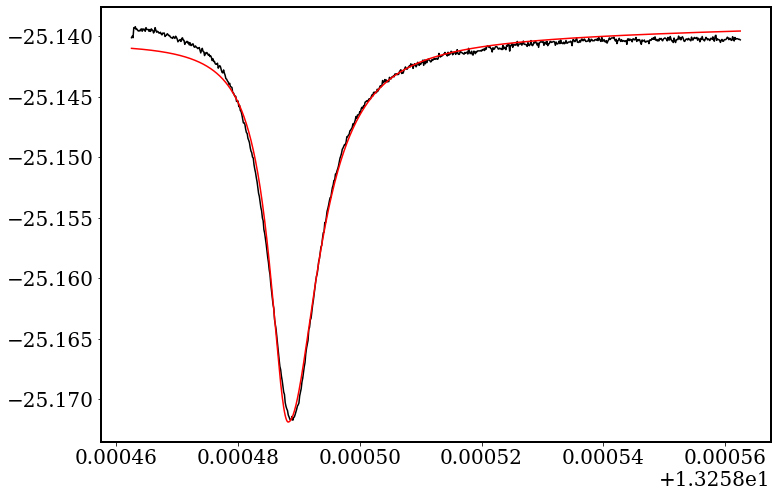

Q_factor =  1.37e+06 +/- 0.003561260825526892 	 |	 center = 13.258488234425293
RMSE =  0.0006580190295640636
#===================================
Opening  Zoomed_peak1_23:03:08:11:48:01.dat ...


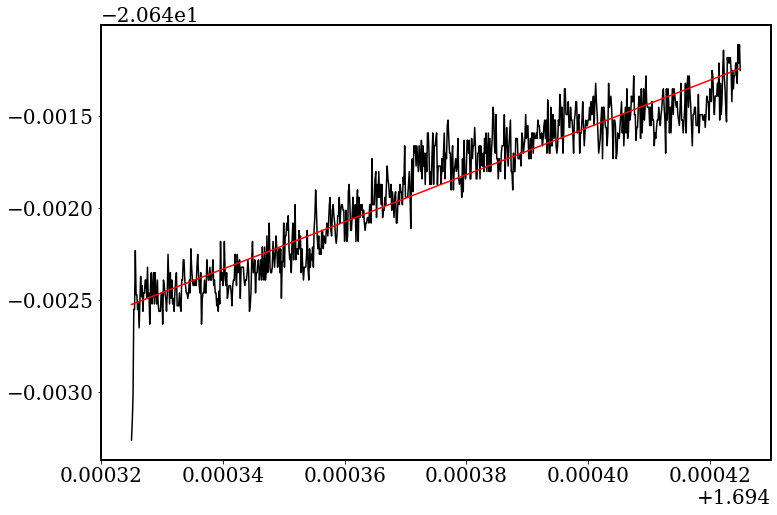

Q_factor =  1.05e+03 +/- 107.75829816238473 	 |	 center = 1.694325
RMSE =  0.00012231383672057445
#===================================
Opening  Zoomed_peak136_23:03:08:23:22:42.dat ...


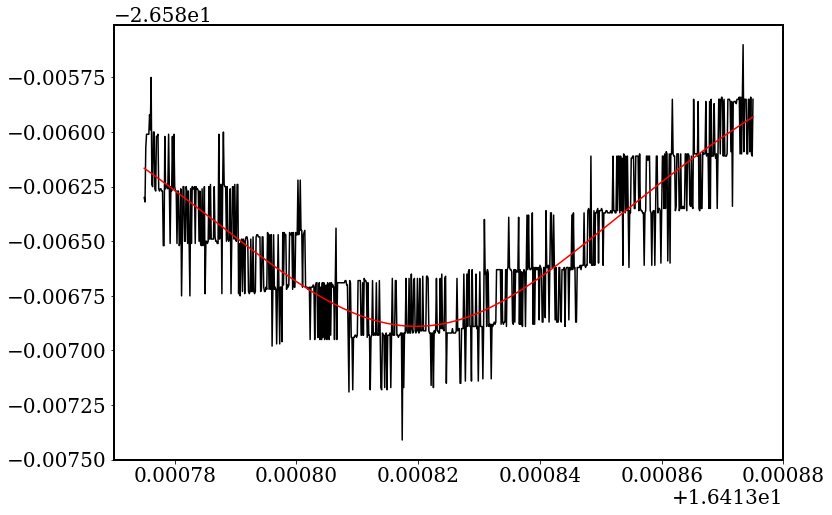

Q_factor =  1.46e+05 +/- 0.011208627623189037 	 |	 center = 16.41381997647852
RMSE =  0.00015857740530481548
#===================================
Opening  Zoomed_peak96_23:03:08:20:00:26.dat ...


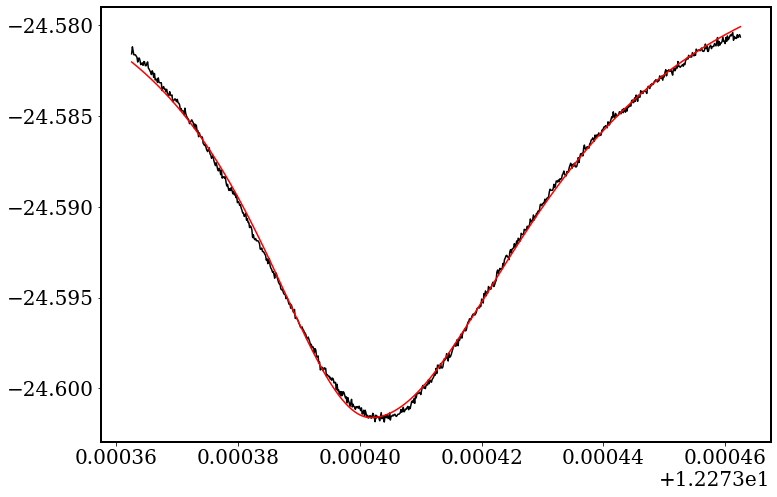

Q_factor =  2.12e+05 +/- 0.0009764205955660094 	 |	 center = 12.273401902315888
RMSE =  0.00023959185646346074
#===================================
Opening  Zoomed_peak54_23:03:08:16:58:25.dat ...


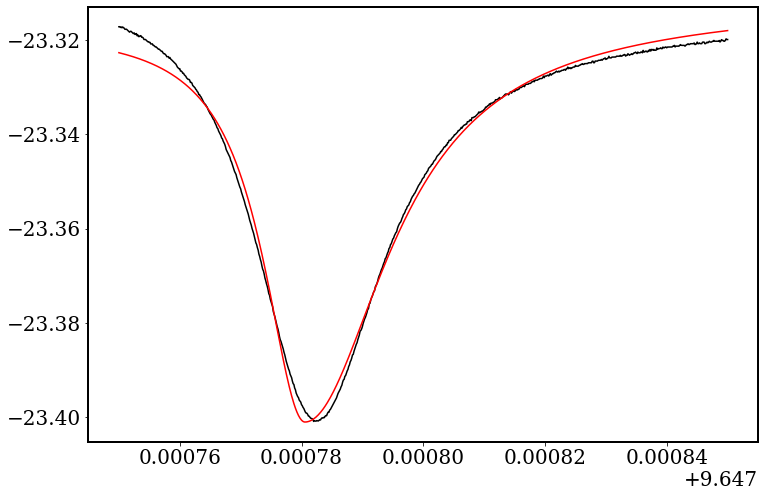

Q_factor =  3.89e+05 +/- 0.0029805078297703977 	 |	 center = 9.647780592070093
RMSE =  0.002067379195359561
#===================================
Opening  Zoomed_peak90_23:03:08:19:36:28.dat ...


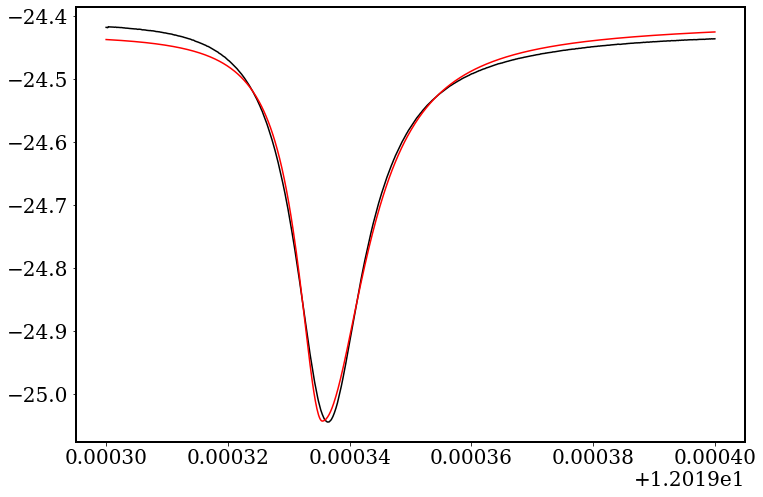

Q_factor =  8.89e+05 +/- 0.002873793876192834 	 |	 center = 12.019335512054907
RMSE =  0.011907147033133354
#===================================
Opening  Zoomed_peak113_23:03:08:21:16:57.dat ...


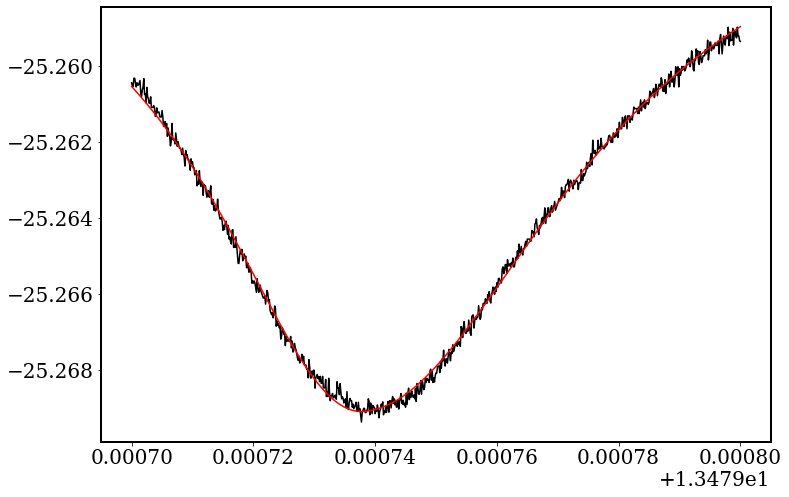

Q_factor =  1.88e+05 +/- 0.0011813774853158935 	 |	 center = 13.479737794441593
RMSE =  0.00016052842925086153
#===================================
Opening  Zoomed_peak133_23:03:08:23:12:11.dat ...


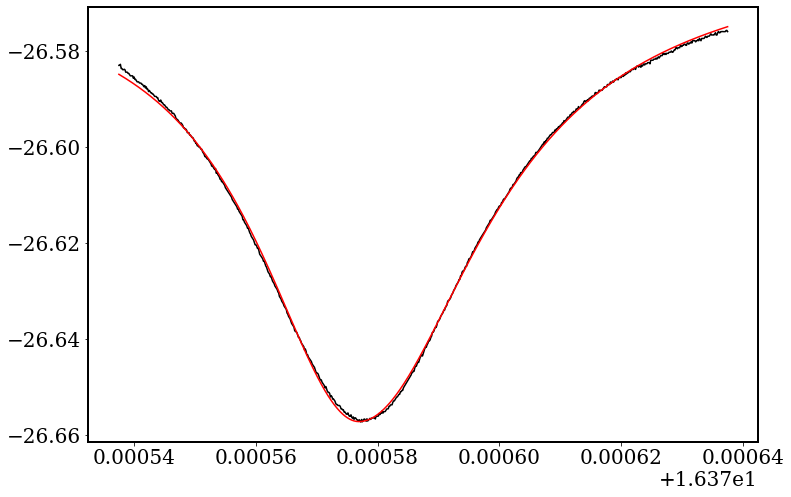

Q_factor =  3.65e+05 +/- 0.0007418847089681362 	 |	 center = 16.370577002066202
RMSE =  0.0005897034240304764
#===================================
Opening  Zoomed_peak64_23:03:08:17:32:33.dat ...


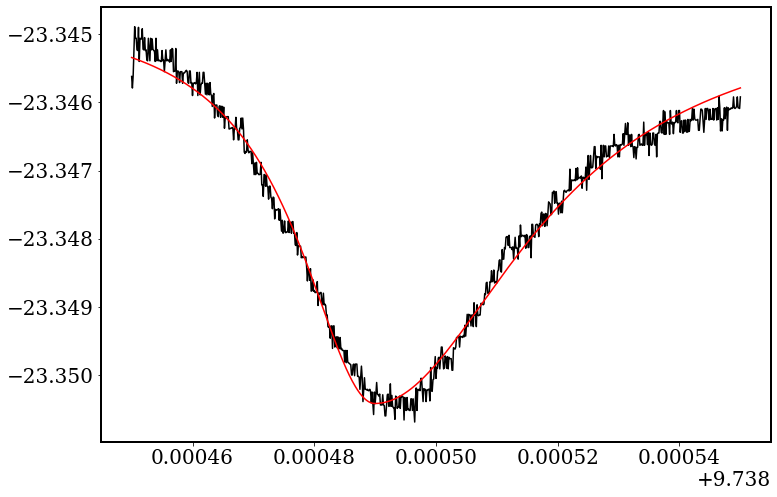

Q_factor =  2.14e+05 +/- 0.003536566178482426 	 |	 center = 9.73848995625328
RMSE =  0.0001902249498657051
#===================================
Opening  Zoomed_peak17_23:03:08:13:49:58.dat ...


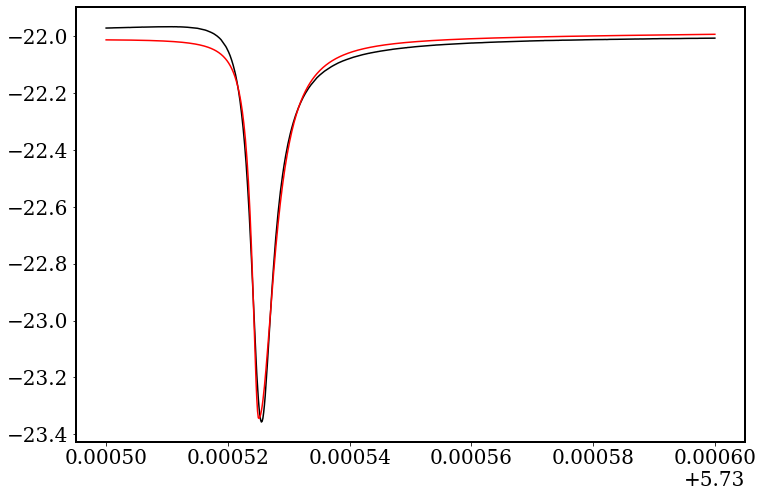

Q_factor =  1.29e+06 +/- 0.004891377169790633 	 |	 center = 5.730525058103881
RMSE =  0.028730542855297945
#===================================
Opening  Zoomed_peak35_23:03:08:15:39:44.dat ...


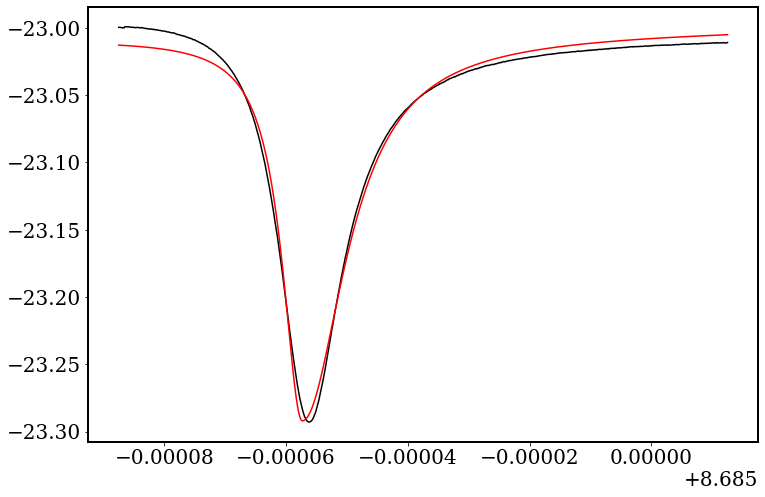

Q_factor =  6.94e+05 +/- 0.0037495247258685868 	 |	 center = 8.6849426589581
RMSE =  0.007194304966102863
#===================================
Opening  Zoomed_peak86_23:03:08:18:47:33.dat ...


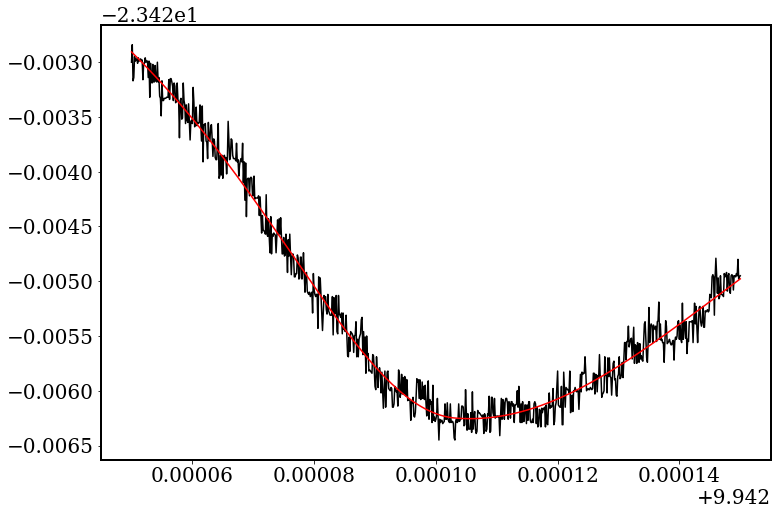

Q_factor =  8.10e+04 +/- 0.008446448051849 	 |	 center = 9.942103213694025
RMSE =  0.00012427056408310876
#===================================
Opening  Zoomed_peak91_23:03:08:19:41:08.dat ...


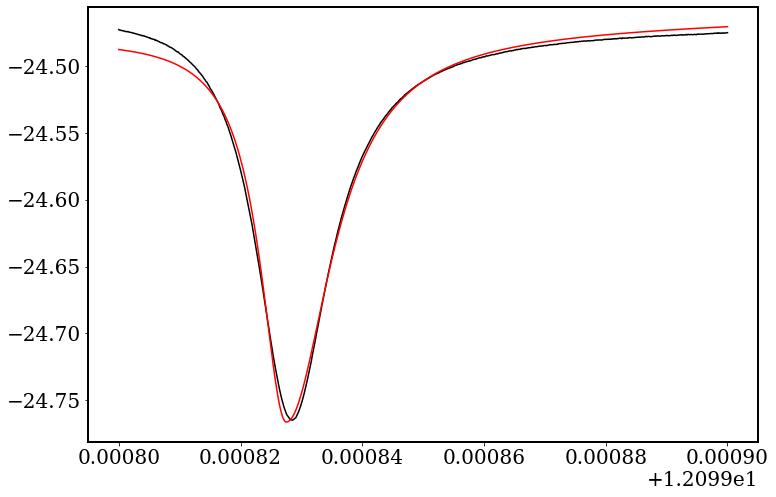

Q_factor =  8.59e+05 +/- 0.002890121554127622 	 |	 center = 12.09982752550909
RMSE =  0.00569160050067335
#===================================
Opening  Zoomed_peak14_23:03:08:13:31:55.dat ...


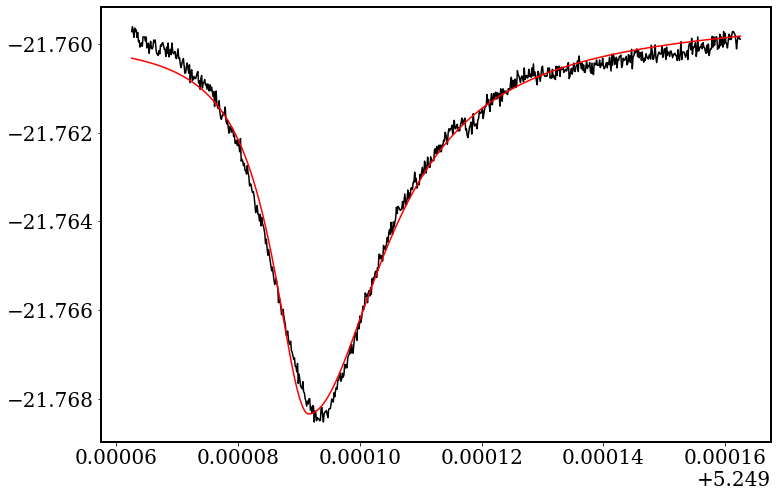

Q_factor =  2.39e+05 +/- 0.0033456165673346676 	 |	 center = 5.249091595724604
RMSE =  0.00022823906998200728
#===================================
Opening  Zoomed_peak65_23:03:08:17:35:46.dat ...


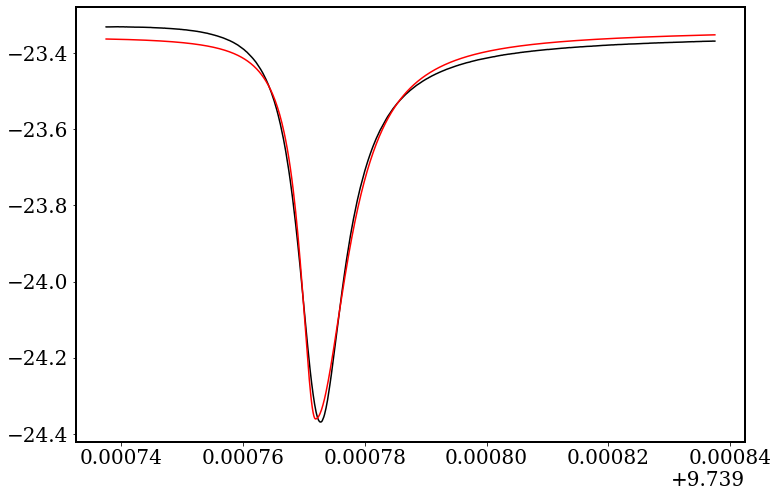

Q_factor =  1.04e+06 +/- 0.00373600644329979 	 |	 center = 9.73977189154799
RMSE =  0.022494143036464145
#===================================
Opening  Zoomed_peak43_23:03:08:16:18:45.dat ...


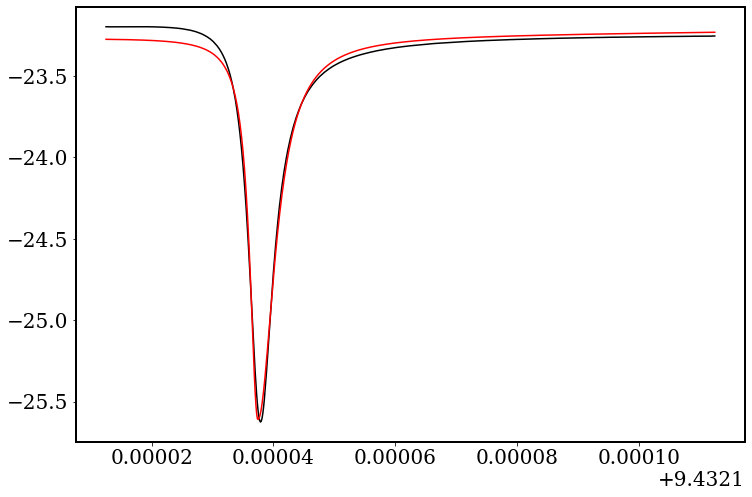

Q_factor =  1.91e+06 +/- 0.004312754223211843 	 |	 center = 9.432137445116316
RMSE =  0.04581039780441201
#===================================
Opening  Zoomed_peak134_23:03:08:23:15:38.dat ...


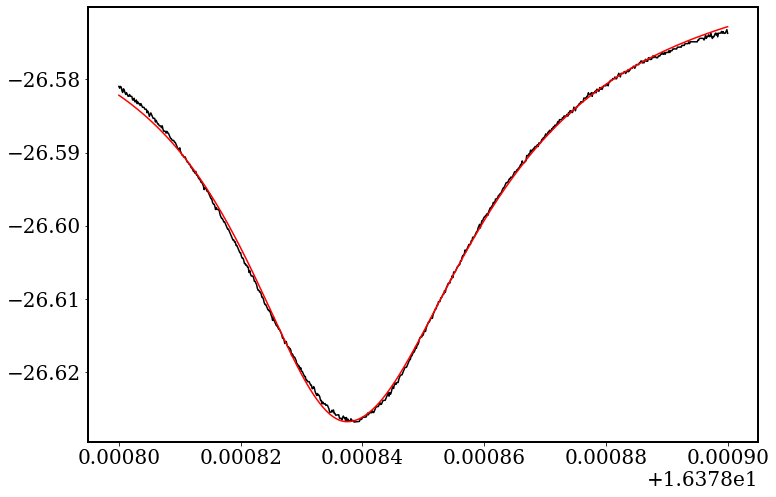

Q_factor =  3.50e+05 +/- 0.0008953949187835456 	 |	 center = 16.37883759676916
RMSE =  0.00046831676679496724
#===================================
Opening  Zoomed_peak42_23:03:08:16:06:00.dat ...


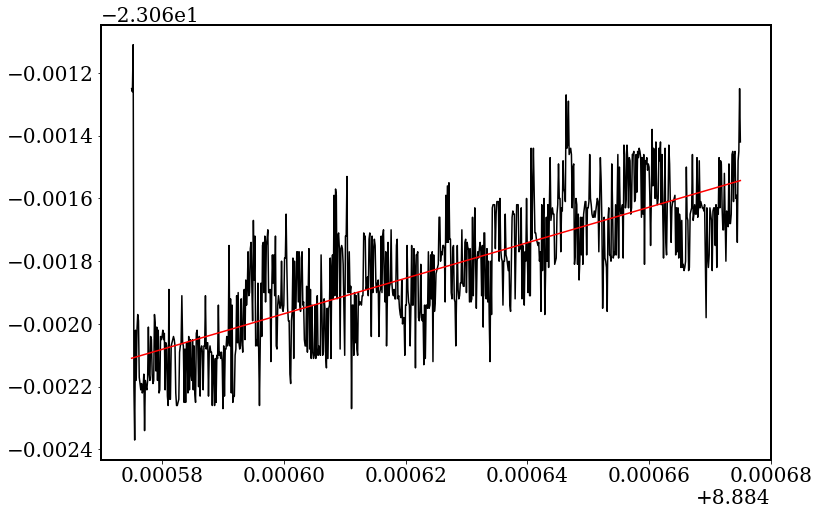

Q_factor =  5.47e+03 +/- 2.880712417058851e-13 	 |	 center = 8.884589593629606
RMSE =  0.00014175961129771886
#===================================
Opening  Zoomed_peak68_23:03:08:17:45:53.dat ...


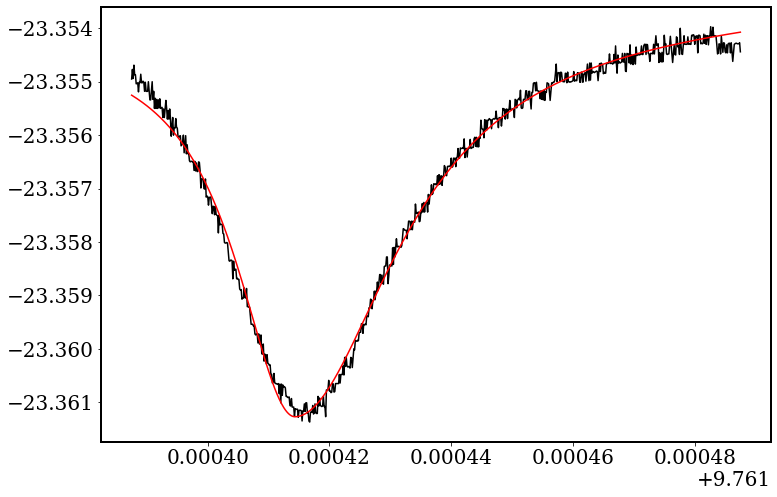

Q_factor =  3.04e+05 +/- 0.0026754911614736182 	 |	 center = 9.761414387583011
RMSE =  0.00016527247906836733
#===================================
Opening  Zoomed_peak93_23:03:08:19:49:03.dat ...


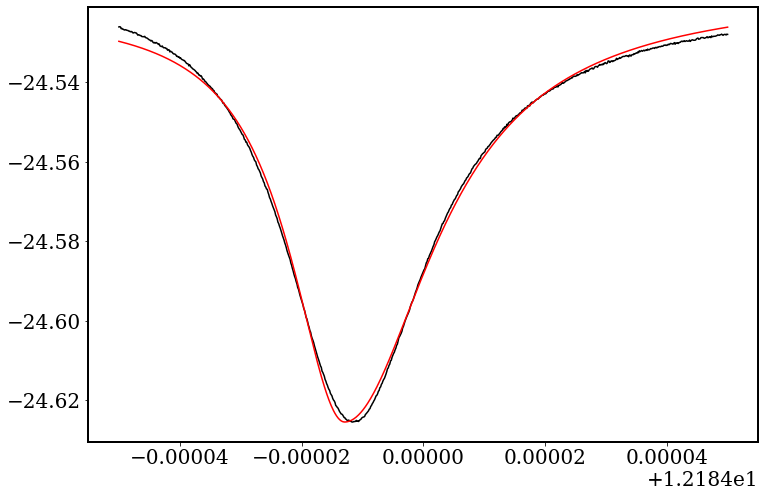

Q_factor =  4.27e+05 +/- 0.0017782532308417225 	 |	 center = 12.183987102505151
RMSE =  0.0015232307386430066
#===================================
Opening  Zoomed_peak51_23:03:08:16:47:33.dat ...


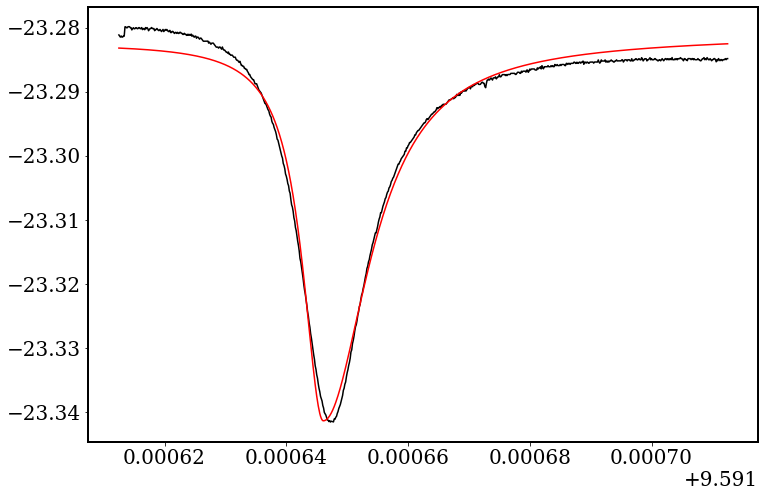

Q_factor =  7.27e+05 +/- 0.004506378976435876 	 |	 center = 9.591646083477178
RMSE =  0.0018457005846629264
#===================================
Opening  Zoomed_peak24_23:03:08:14:28:35.dat ...


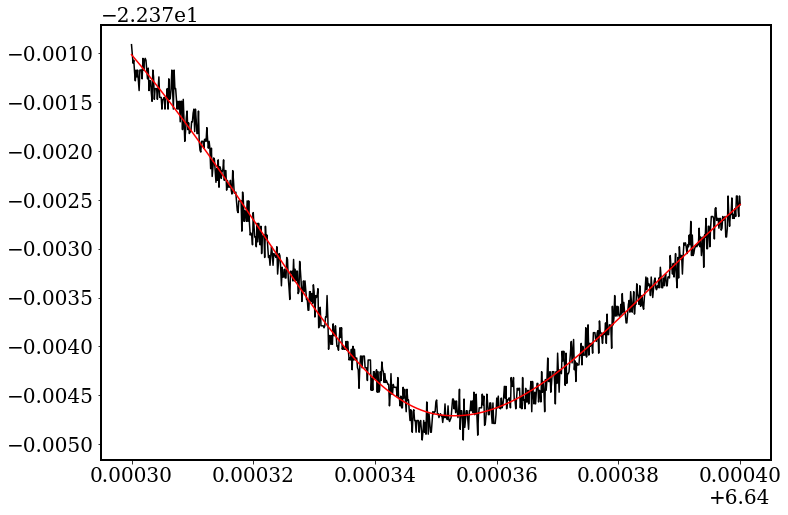

Q_factor =  5.98e+04 +/- 0.0021334266067854993 	 |	 center = 6.640350436346848
RMSE =  0.00011343678996402214
#===================================
Opening  Zoomed_peak22_23:03:08:14:20:18.dat ...


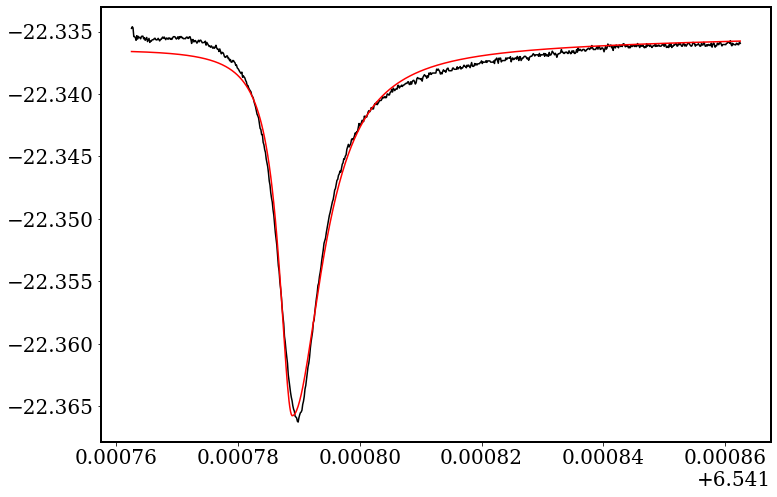

Q_factor =  7.62e+05 +/- 0.003940903286265958 	 |	 center = 6.541788906760976
RMSE =  0.0006810602911489809
#===================================
Opening  Zoomed_peak128_23:03:08:22:53:44.dat ...


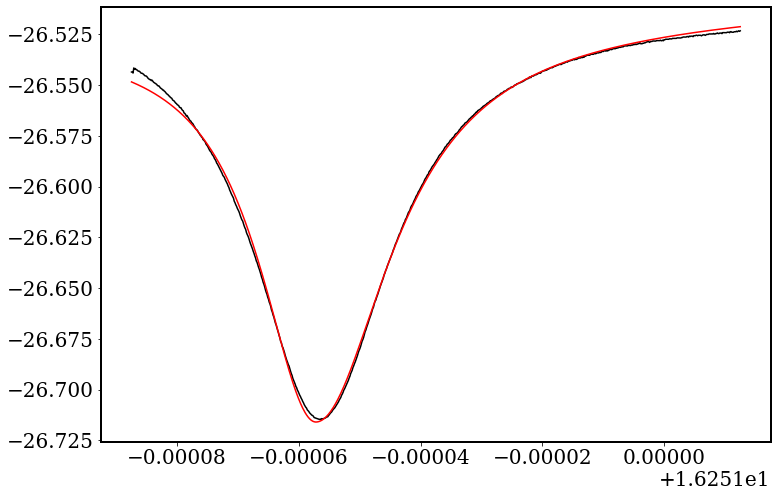

Q_factor =  6.23e+05 +/- 0.001336975720741673 	 |	 center = 16.250942832624183
RMSE =  0.002058167219099731
#===================================
Opening  Zoomed_peak70_23:03:08:17:53:04.dat ...


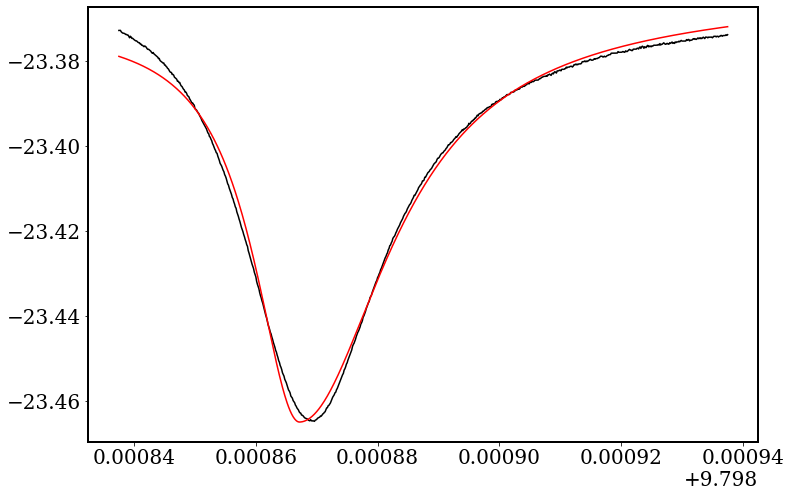

Q_factor =  3.65e+05 +/- 0.002698063914087899 	 |	 center = 9.798867198499249
RMSE =  0.002124864779958872
#===================================
Opening  Zoomed_peak72_23:03:08:17:59:30.dat ...


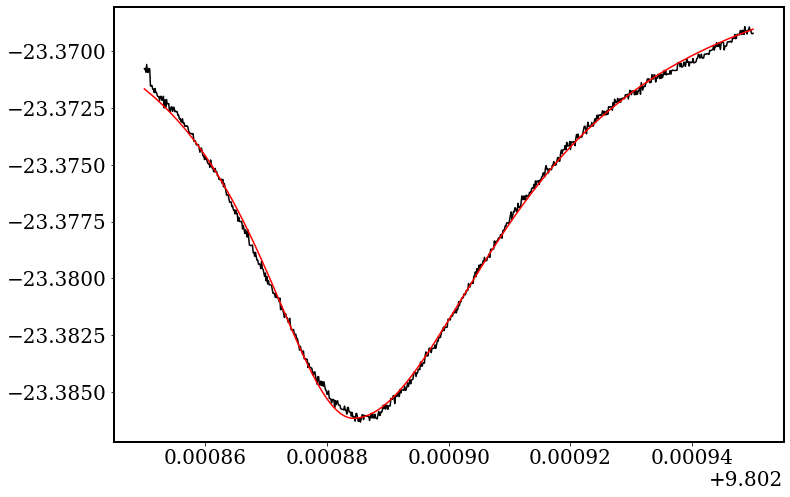

Q_factor =  1.93e+05 +/- 0.0012291790103939292 	 |	 center = 9.802884434457301
RMSE =  0.00021662540708119188
#===================================
Opening  Zoomed_peak34_23:03:08:15:36:31.dat ...


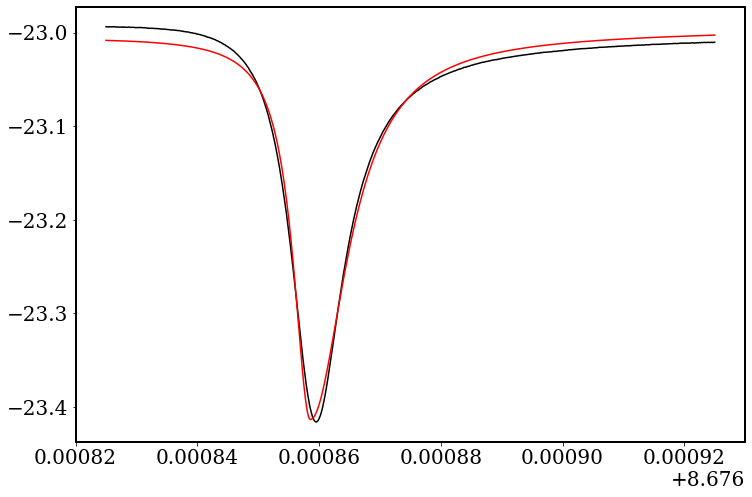

Q_factor =  8.19e+05 +/- 0.0037772848230915304 	 |	 center = 8.67685856577086
RMSE =  0.009754673153826936
#===================================
Opening  Zoomed_peak121_23:03:08:22:22:26.dat ...


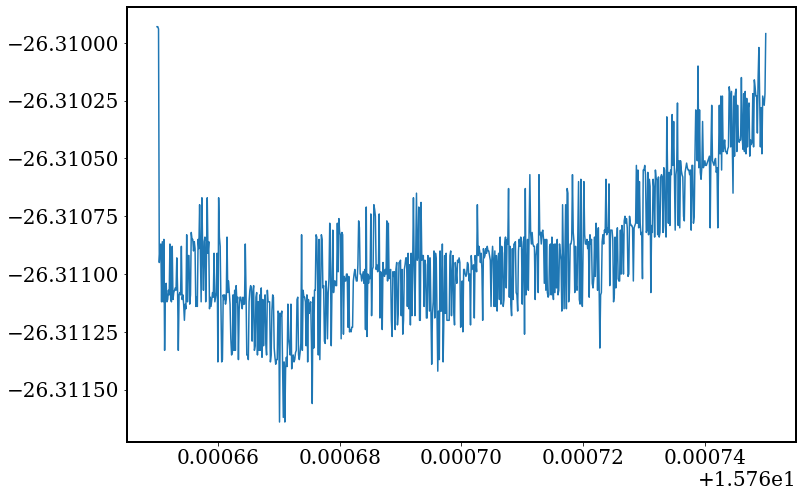

There was a problem during the fit!
#===================================
Opening  Zoomed_peak4_23:03:08:12:02:51.dat ...


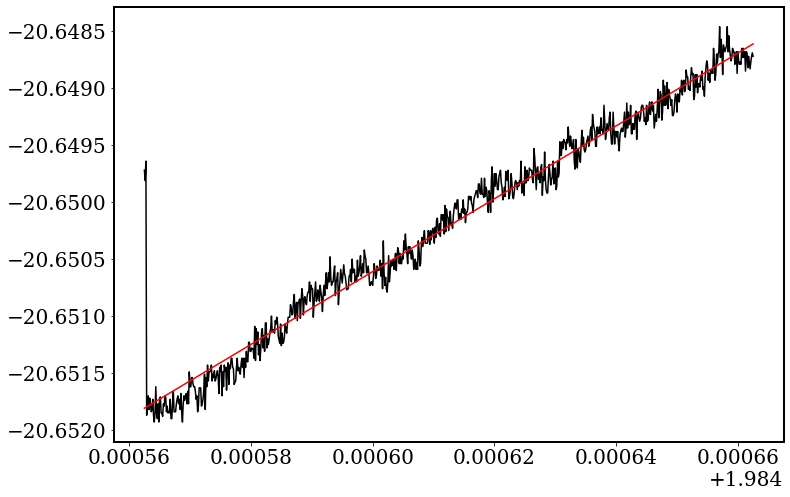

Q_factor =  1.08e+03 +/- 2.1677499798498253e-13 	 |	 center = 1.984579673792805
RMSE =  0.00017194186768390744
#===================================


In [39]:
folder_path = '/home/matteo/Scrivania/Bauscia/BAW_27/Scan_08_03_2023/' #è la cartella dove stanno tutti i .dat
file_to_open = ".dat"   # apre tutti i file che contengono questa stringa da qualche parte
log_file_name = "Scan_08_03_2023_log.csv" # nome del .csv che salva contentente un po' di info utili
#=====================================================

info = []
info.append(['File_name','Depth [dBm]','f_center [MHz]', 'resonance center [MHz]', 'Q','% error Q','RMSE','Asimm'])
list_of_files = os.listdir(folder_path)
file_names = []
for k in range(len(list_of_files)):
    if list_of_files[k].find(file_to_open) != -1:
        nome_file = list_of_files[k]
        file_names.append(nome_file)

for name in file_names:
    data = np.loadtxt(folder_path+name)
    print('Opening ', name, '...')
    freq = data[:,0]*1e-6 #freq in MHz
    power= data[:,1]      #power in dBm
    #power = (10**(power/10))/1000 #W

    try:
        center_guess = freq[np.argmin(power)]
        gamma_guess = 20e-6
        m_guess = np.polyfit(freq,power,deg=1)[0]
        offset_guess = np.polyfit(freq,power,deg=1)[1]
        norm_guess = 1e-6
        asim_guess = 1

        initial_guess = np.array([norm_guess,gamma_guess,center_guess,m_guess,offset_guess,asim_guess])
        bounds = np.array([[0,0,freq[0],np.min([m_guess/10,m_guess*10]),np.min([offset_guess/10,offset_guess*10]),0],
                           [1e-4,1e-3,freq[-1],np.max([m_guess/10,m_guess*10]),np.max([offset_guess/10,offset_guess*10]),100]])

        popt,pcov = curve_fit(fit_func,xdata=freq,ydata=power,p0=initial_guess,bounds=bounds)
        perr = (np.diag(pcov))**0.5

        norm = popt[0]
        gamma = popt[1]  #MHz
        center = popt[2] #MHz
        #depth = 1./(np.pi*gamma)*norm
        depth = np.max(popt[0]*cauchy_asim(freq,popt[1],popt[2],popt[-1]))
        Q_factor = center/(gamma*2)
        err = ((perr[2]/(popt[1]*2))**2+(popt[2]*perr[1]/(2*popt[2]**2))**2)**0.5

        rmse =RMSE(power,fit_func(freq,*popt))
        info.append([name,depth,freq[len(freq)//2],center,Q_factor,100*err/Q_factor,rmse,popt[-1]])
        plt.plot(freq,power,c='k')
        plt.plot(freq,fit_func(freq,*popt),color='r',label='Fit')
        plt.show()
        print('Q_factor = ', "{:.2e}".format(Q_factor), '+/-', err, '\t','|\t center =', center)
        print('RMSE = ', rmse)
        print('#===================================')
    except:
        plt.plot(freq,power)
        plt.show()
        info.append([name,'-','-','-','-','-','-','-'])
        print("There was a problem during the fit!")
        print('#===================================')


# sort for resonance frequencies
a = np.array(info)[:,2]
a[a=='-'] = '0'
index_sorted = np.argsort(a[1:].astype(float))[::-1]
info_array = np.array(info)
info_array[1:,:] = info_array[1:,:][index_sorted,:]
info = list(info_array)
 
        
        
with open(log_file_name, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(info)
f.close()

# Fit di un singolo .txt

Parametro  1 :  1.9865921054970873e-05  +/-  2.1543927524745416e-07
Parametro  2 :  1.2557271762380158e-06  +/-  1.2109469605395493e-08
Parametro  3 :  5.670993889381822  +/-  1.3887888850561965e-08
Parametro  4 :  268.0678169722029  +/-  127.65563842448095
Parametro  5 :  -1542.1810823522712  +/-  723.937052565258
Parametro  6 :  0.500978240707932  +/-  0.012451066475930547
Q = 2.26e+06  +/-  0.005529819340283934
RMSE =  0.10105442881061827


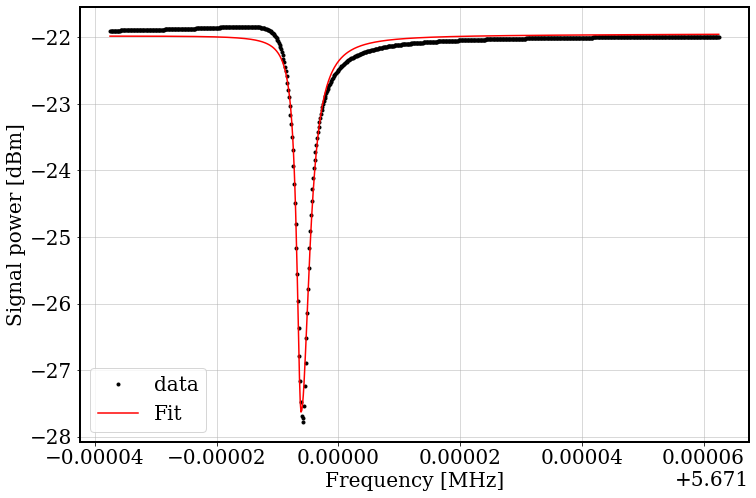

In [37]:
file_to_open = '/home/matteo/Scrivania/Bauscia//BAW_27/Scan_08_03_2023/Zoomed_peak16_23:03:08:13:45:39.dat'

data = np.loadtxt(file_to_open)
freq = data[:,0]*1e-6 #freq in MHz
#freq = data[:,0]#freq in MHz

power= data[:,1]      #power in dBm

#power = (10**(power/10))/1000 #W
#power=power*1e6 #uW
#=====================================================

center_guess = freq[np.argmin(power)]
gamma_guess = 20e-6
m_guess = np.polyfit(freq,power,deg=1)[0]
offset_guess = np.polyfit(freq,power,deg=1)[1]
norm_guess = 1e-6
asim_guess = 1

initial_guess = np.array([norm_guess,gamma_guess,center_guess,m_guess,offset_guess,asim_guess])
bounds = np.array([[0,0,freq[0],np.min([m_guess/10,m_guess*10]),np.min([offset_guess/10,offset_guess*10]),0],
                   [1e-4,1e-3,freq[-1],np.max([m_guess/10,m_guess*10]),np.max([offset_guess/10,offset_guess*10]),100]])

popt,pcov = curve_fit(fit_func,xdata=freq,ydata=power,p0=initial_guess,bounds=bounds)

perr = (np.diag(pcov))**0.5

for i in range(len(popt)):
    print('Parametro ', i+1, ': ', popt[i], ' +/- ', perr[i])
Q_factor = popt[2]/(popt[1]*2)
err = ((perr[2]/(popt[1]*2))**2+(popt[2]*perr[1]/(2*popt[2]**2))**2)**0.5
print('Q = ' + "{:.2e}".format(Q_factor),' +/- ', err)
print('RMSE = ', RMSE(power,fit_func(freq,*popt)))

plt.plot(freq,power,'.',c='k',label='data')
plt.plot(freq,fit_func(freq,*popt),color='r',label='Fit')
plt.grid(alpha=0.6)
plt.legend()
plt.savefig('Resonance_example.png')
plt.ylabel('Signal power [dBm]')
plt.xlabel('Frequency [MHz]')
plt.show()

In [24]:
def fit_func(x,norm,gamma,center,m,offset,asim):

26806.78169721983

In [33]:
np.sign(offset_guess)

-1.0

-152243.44051717047